<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Contraceptive_Project_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

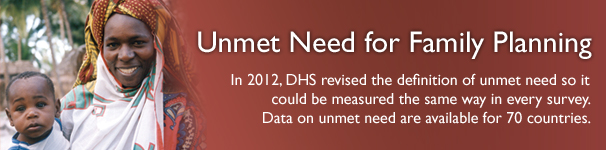

https://nepalindata.com/media/insight/Teenage_Childbearing_and_Unmet_Need_for_Family_Planning_revised-01-01.jpg

#<font color='orange'> <div style="text-align: justifie">**"Over 200 million women want access to contraception but can’t get it"</p></font>**

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

**To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**

**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.

# Hypothesis: Research Question ?
 What is the question that you would like to answer in order to make a decision.

**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Explication
**1878 0bservations and 24 variables has been choosen for in this process**


**The features variables are :**

* Region :


* Type_of_place_of_residence:



* Highest_educational_level:



* Religion:



* Wealth_index_combined:


* Knowledge_of_ovulatory_cycle:


* Current_contraceptive_method:


* Current_use_by_method_type:


* At_health_facility_told_of_family_planning:

* Contraception_is_woman_s_business_man_should_not_worry:


* Women_who_use_contraception_become_promiscuous:


 * Husband_partner_s_occupation:


 * Respondent_currently_working:


 * Respondent_earns_more_than_husband_partner:


 * Total_lifetime_number_of_sex_partners:


 * Years_since_first_cohabitation:


 * Age_at_first_cohabitation:


 * Number_of_living_children:


 * Age_of_respondent_at_1st_birth:


 * Husband_partner_s_age:


 * Respondent_s_current_age:


 * Number_of_household_members:


 * Number_of_children_5_and_under_in_household:


**The target variable is :**
 *  **Unmet need for contraception** :

 
 In terms of analysis, the objective is to verify the following hypotheses: The married woman’s choice of a modern contraceptive method (MCM) is characterized by:

* The educational level (+)
* Number of children (+)
* Number of partners (+)
* Woman's age (-)
* Husband's age (-)
* Professional activity (-)
* Sexual activity (+)
* Religion (Ca)
* Number of household members (+)
* Perception about contraception (+)
* Fertility preference (-)




# I. PACKAGES

In [505]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

# II. DATA CLEANING

## 1. LOAD DATA

In [506]:
df = pd.read_excel("contraceptive.xlsx")

In [507]:
# display fisrt five rows
df.head()

,Respondent's current age,Region,Type of place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Number of trips in last 12 months,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Total children ever born,Age of most recent child,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Visited health facility last 12 months,"Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Covered by health insurance,More than once unions,Age at first cohabitation,Age at first sex,Recent sexual activity,Husband's desire for children,Unmet need for contraception,Husband/partner's education level,Husband/partner's occupation,Respondent's occupation,Husband/partner's age,Person who usually decides on respondent's health care,Total lifetime number of sex partners
0,31,Sud,Rural,Primary,Catholic,4,2,1,Middle,3,19.00,After period ended,3,1.00,Non_user _intends to use later,No,No,Yes,Disagree,Disagree,No,0,27,15,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2
1,38,Sud,Rural,Higher,Catholic,5,1,0,Middle,1,31.00,Middle of the cycle,3,3.00,Using_modern_method,No,No,Yes,Agree,Disagree,No,0,29,18,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2
2,38,Sud,Rural,Secondary,Protestant,6,1,1,Middle,1,28.00,After period ended,4,1.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,28,24,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2
3,35,Sud,Rural,Secondary,Catholic,6,0,0,Middle,0,23.00,After period ended,4,7.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,22,18,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2
4,37,Sud,Rural,Secondary,Catholic,7,1,1,Poorer,1,18.00,After period ended,5,3.00,Using_modern_method,No,No,No,Agree,Agree,No,0,18,17,Active in last 4 weeks,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2


In [508]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Number_of_trips_in_last_12_months', 'Wealth_index_combined', 'Births_in_last_five_years',
       'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle', 'Total_children_ever_born', 'Age_of_most_recent_child',
       'Contraceptive_use_and_intention', 'Heard_family_planning_on_radio_last_few_months', 'Heard_family_planning_on_TV_last_few_months',
       'Visited_health_facility_last_12_months', 'Contraception_is_woman_s_business_man_should_not_worry',
       'Women_who_use_contraception_become_promiscuous', 'Covered_by_health_insurance', 'More_than_once_unions', 'Age_at_first_cohabitation',
       'Age_at_first_sex', 'Recent_sexual_activity', 'Husband_s_desire_for_children', 'Unmet_need_for_contraception',
       'Husband_partner_s_education_level', 'Husband_partner_s_occupation

In [509]:
# how they appear
df.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Contraceptive_use_and_intention,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners
0,31,Sud,Rural,Primary,Catholic,4,2,1,Middle,3,19.00,After period ended,3,1.00,Non_user _intends to use later,No,No,Yes,Disagree,Disagree,No,0,27,15,Active in last 4 weeks,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2
1,38,Sud,Rural,Higher,Catholic,5,1,0,Middle,1,31.00,Middle of the cycle,3,3.00,Using_modern_method,No,No,Yes,Agree,Disagree,No,0,29,18,Active in last 4 weeks,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2
2,38,Sud,Rural,Secondary,Protestant,6,1,1,Middle,1,28.00,After period ended,4,1.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,28,24,Active in last 4 weeks,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2
3,35,Sud,Rural,Secondary,Catholic,6,0,0,Middle,0,23.00,After period ended,4,7.00,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,22,18,Active in last 4 weeks,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2
4,37,Sud,Rural,Secondary,Catholic,7,1,1,Poorer,1,18.00,After period ended,5,3.00,Using_modern_method,No,No,No,Agree,Agree,No,0,18,17,Active in last 4 weeks,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2


In [510]:
# some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Respondent_s_current_age                                3033 non-null   int64  
 1   Region                                                  3033 non-null   object 
 2   Type_of_place_of_residence                              3033 non-null   object 
 3   Highest_educational_level                               3033 non-null   object 
 4   Religion                                                3033 non-null   object 
 5   Number_of_household_members                             3033 non-null   int64  
 6   Number_of_children_5_and_under_in_household             3033 non-null   int64  
 7   Number_of_trips_in_last_12_months                       3033 non-null   int64  
 8   Wealth_index_combined                 

In [511]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of observations: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [512]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of observations:  3033

Number of features: 33

Data Features:

Missing values: 353

Unique values:
Respondent_s_current_age                                  34
Region                                                    11
Type_of_place_of_residence                                 2
Highest_educational_level                                  4
Religion                                                   5
                                                          ..
Husband_partner_s_occupation                               8
Respondent_s_occupation                                    8
Husband_partner_s_age                                     48
Person_who_usually_decides_on_respondent_s_health_care     3
Total_lifetime_number_of_sex_partners                     13
Length: 33, dtype: int64


In [380]:
# Show categoric variable
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Contraceptive_use_and_intention',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Person_who_usually_decides_on_respondent_s_health_care']

In [381]:
cat_cols1=['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Contraceptive_use_and_intention',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Person_who_usually_decides_on_respondent_s_health_care']

In [382]:
cat_cols2=['Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation']

In [383]:
len(cat_cols)

20

Function to correct

In [384]:
# function
def plotcat(data='data', columns='col'):
  colors = ["Salmon", "#5F9EA0"]

  fig, axes = plt.subplots(nrows = 10,ncols = 2,figsize = (15,40))

  for i,feature in enumerate(cat_cols1):
    if i < 5:
      ax = df.groupby([feature,'Unmet_need_for_contraception']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 5 and i < 10:
      ax = df.groupby([feature,'Unmet_need_for_contraception']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-5,1])

      ax.set_title("Distribution of {} % Unmet need for contraception".format(feature), fontsize = 20)
      ax.set_ylabel("Percentage", fontsize=15)
      ax.set_xlabel("{}".format(feature), fontsize=15)
      ax.legend(["No", "Yes"], fontsize=15)

  for patch in ax.patches:
      width, height = patch.get_width(), patch.get_height()
      ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
            color = 'Black',
            weight = 'bold',
            size = 15)

  # ax.yaxis.set_major_formatter(stick.PercentFormatter())
      plt.setp(ax.get_xticklabels(), rotation=0.1, fontsize=15)

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

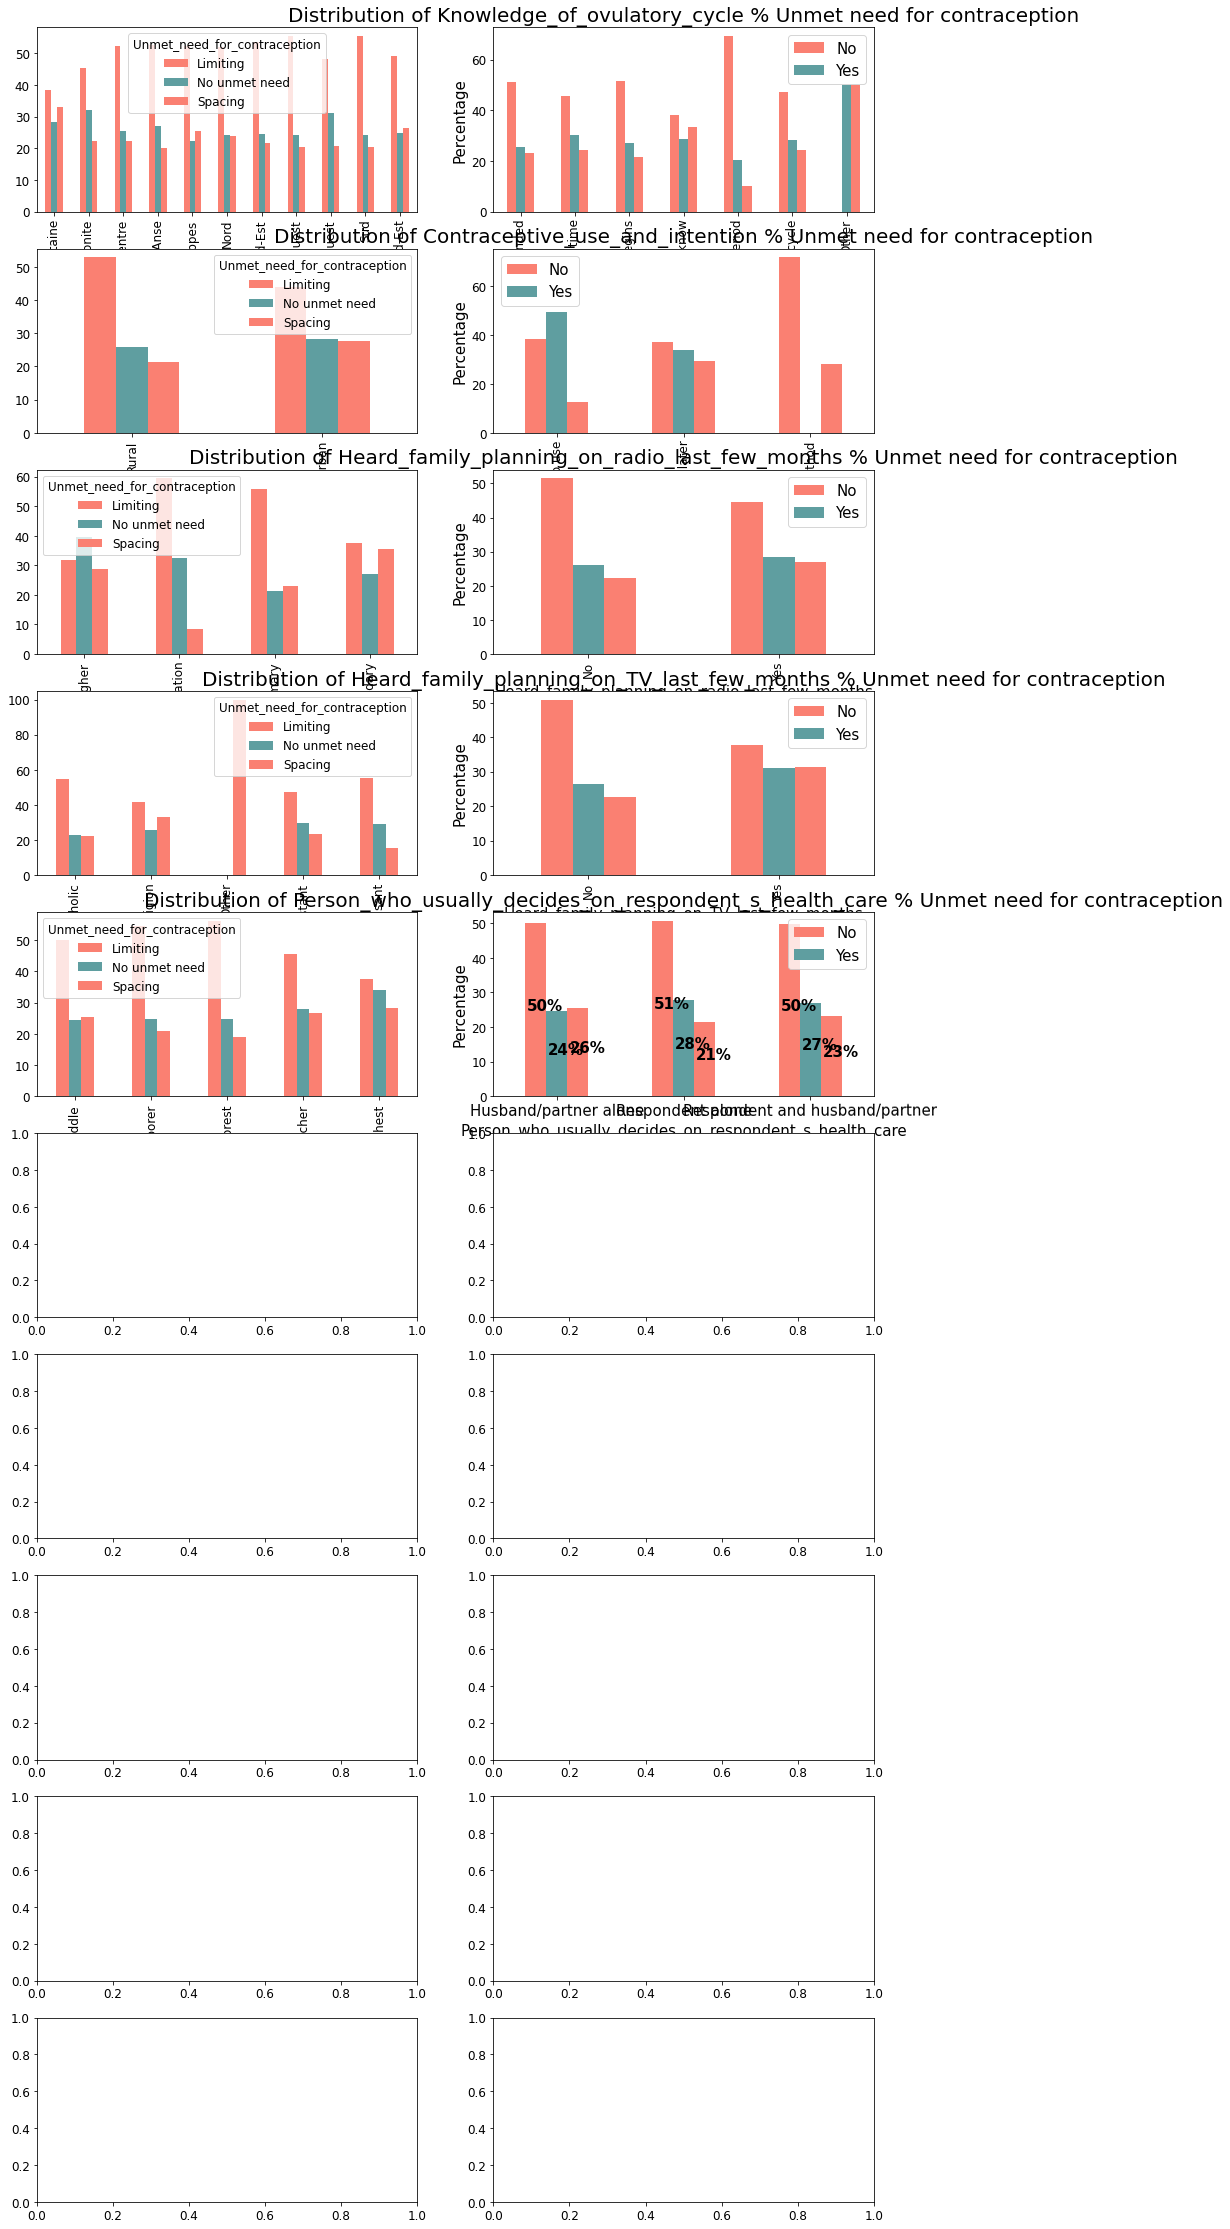

In [385]:
plotcat(df, cat_cols1)

In [386]:
# univariate Analysis
# Calculate absolute frequency and relative frequency for each cateorigal variabl

def prob_category(data,col="Col", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(13,10))
     return result

def generate_barchart(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="black"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="black"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [387]:
df['Unmet_need_for_contraception'].unique()

array(['Limiting', 'Spacing', 'No unmet need'], dtype=object)

In [388]:
df.replace({'Limiting': 'Yes', 'Spacing': 'Yes', 'No unmet need': 'No'}, inplace=True)

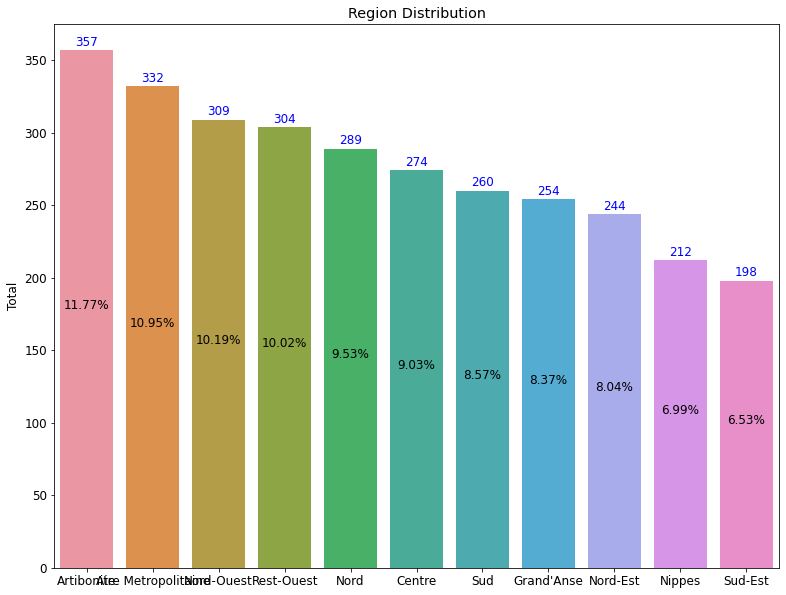

,Total,Percent
Artibonite,357,0.12
Aire Metropolitaine,332,0.11
Nord-Ouest,309,0.10
Rest-Ouest,304,0.10
Nord,289,0.10
Centre,274,0.09
Sud,260,0.09
Grand'Anse,254,0.08
Nord-Est,244,0.08
Nippes,212,0.07


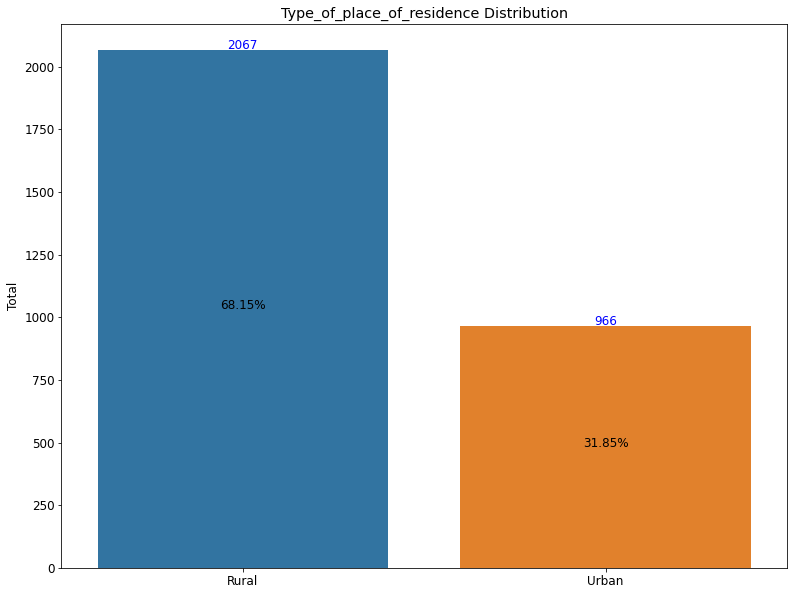

,Total,Percent
Rural,2067,0.68
Urban,966,0.32


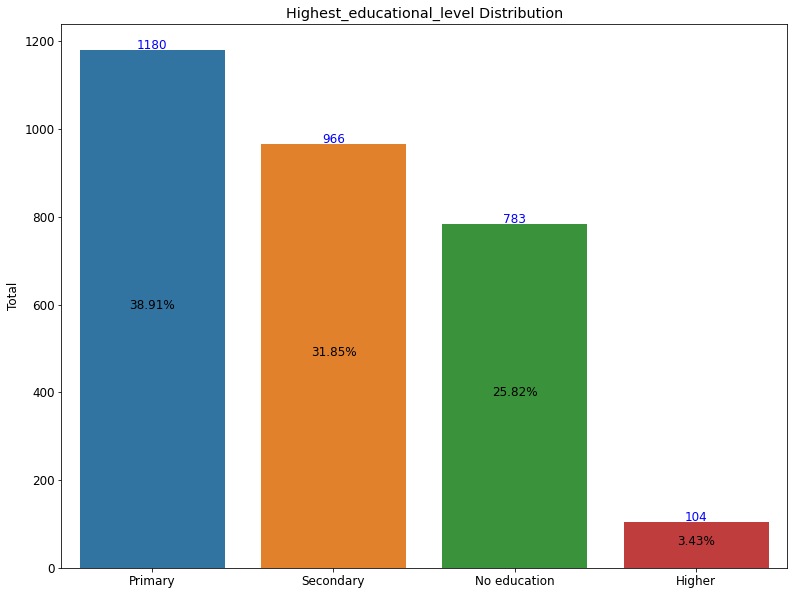

,Total,Percent
Primary,1180,0.39
Secondary,966,0.32
No education,783,0.26
Higher,104,0.03


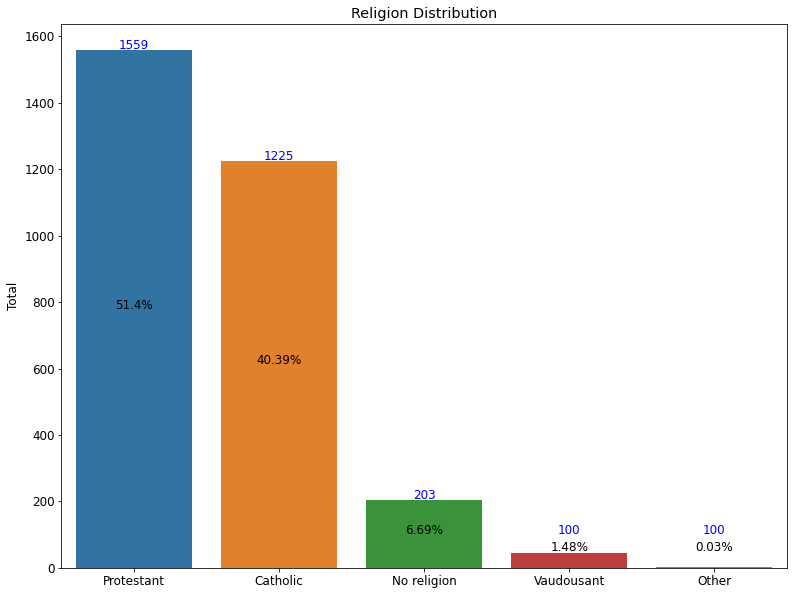

,Total,Percent
Protestant,1559,0.51
Catholic,1225,0.40
No religion,203,0.07
Vaudousant,45,0.01
Other,1,0.00


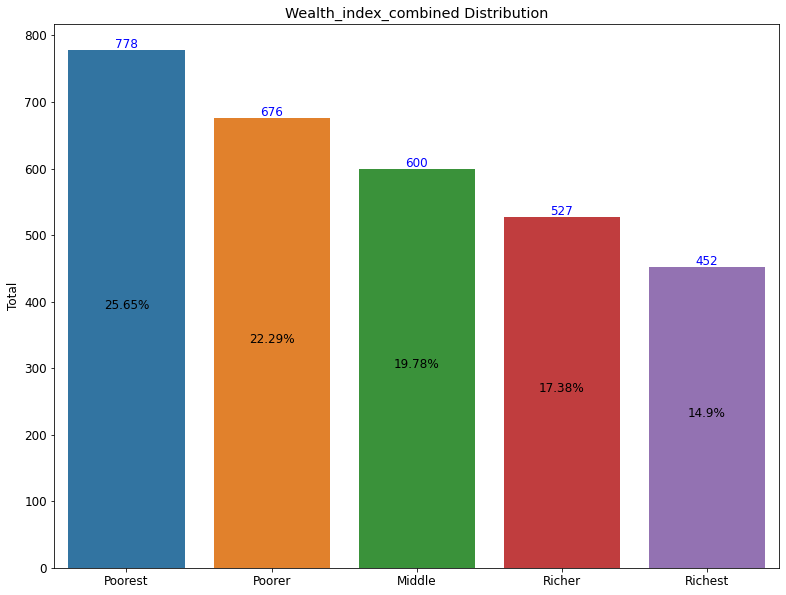

,Total,Percent
Poorest,778,0.26
Poorer,676,0.22
Middle,600,0.20
Richer,527,0.17
Richest,452,0.15


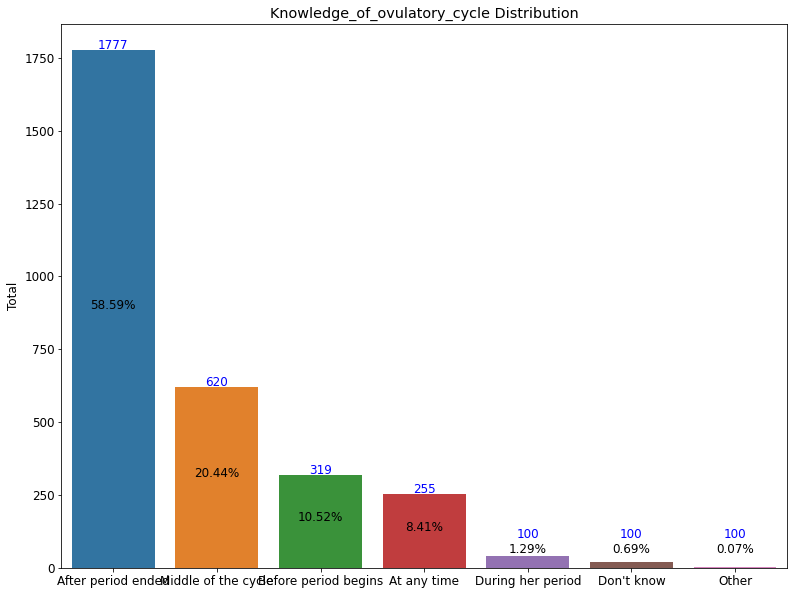

,Total,Percent
After period ended,1777,0.59
Middle of the cycle,620,0.20
Before period begins,319,0.11
At any time,255,0.08
During her period,39,0.01
Don't know,21,0.01
Other,2,0.00


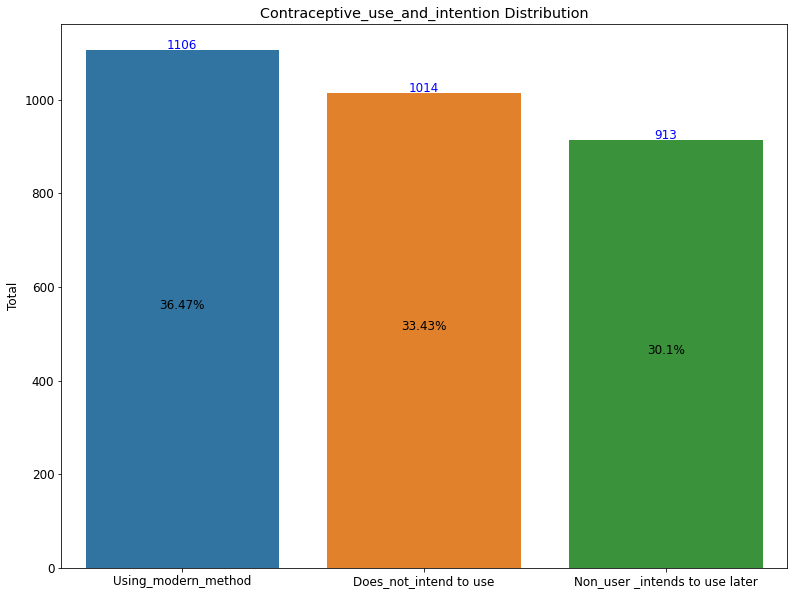

,Total,Percent
Using_modern_method,1106,0.36
Does_not_intend to use,1014,0.33
Non_user _intends to use later,913,0.30


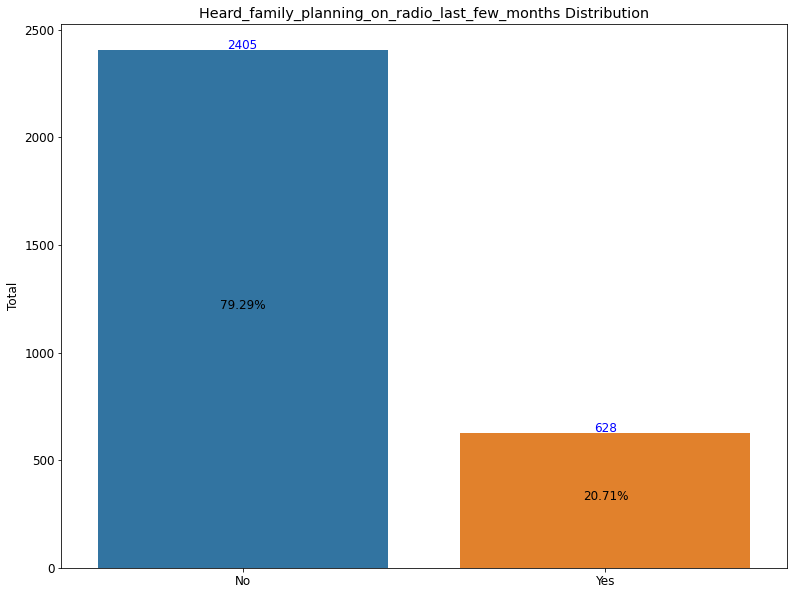

,Total,Percent
No,2405,0.79
Yes,628,0.21


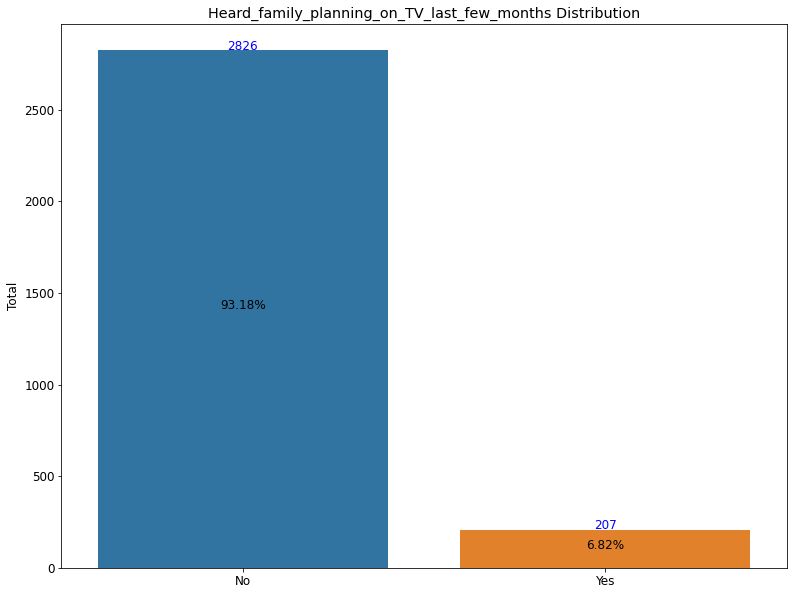

,Total,Percent
No,2826,0.93
Yes,207,0.07


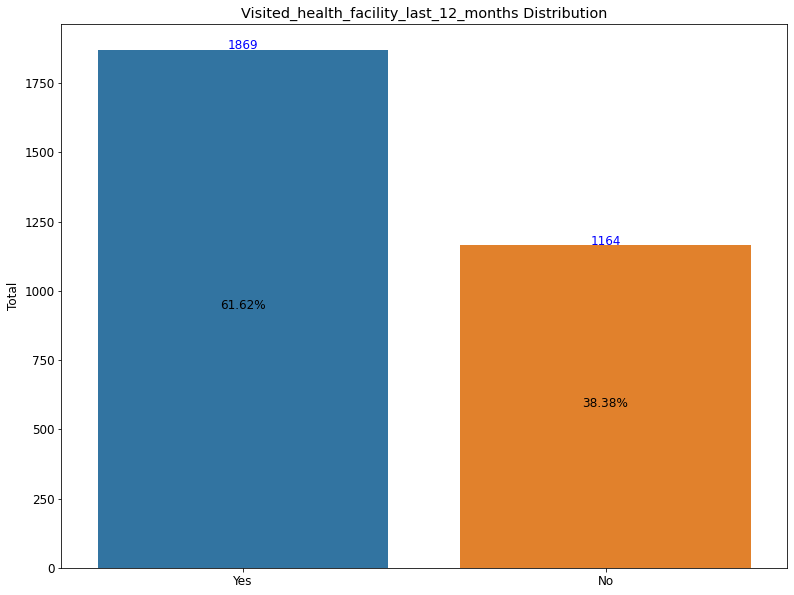

,Total,Percent
Yes,1869,0.62
No,1164,0.38


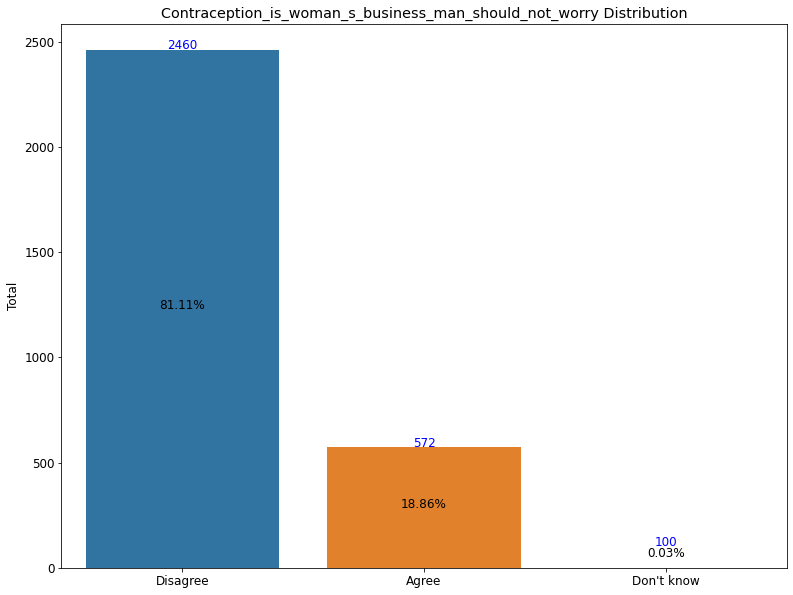

,Total,Percent
Disagree,2460,0.81
Agree,572,0.19
Don't know,1,0.00


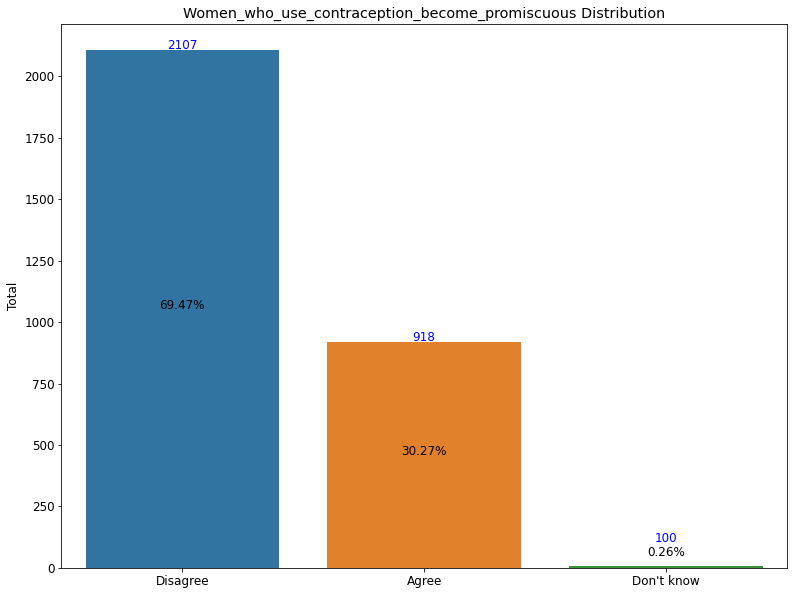

,Total,Percent
Disagree,2107,0.69
Agree,918,0.30
Don't know,8,0.00


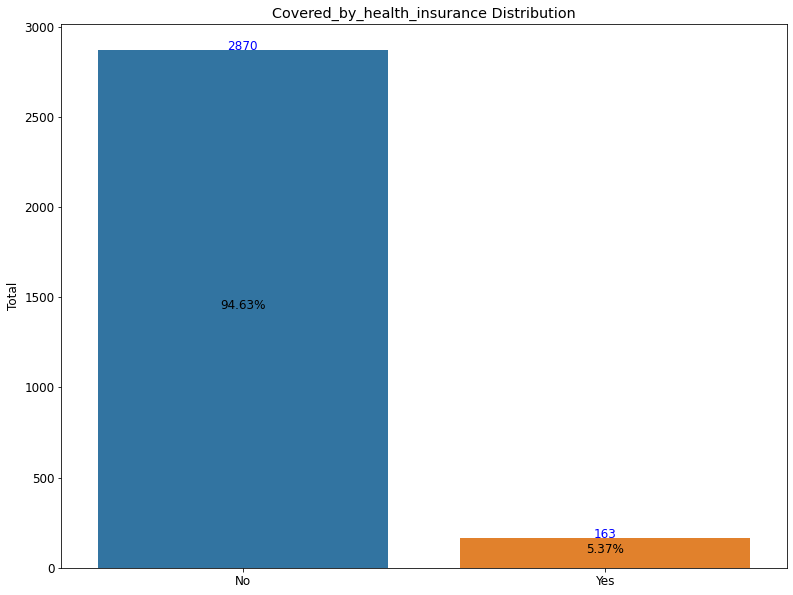

,Total,Percent
No,2870,0.95
Yes,163,0.05


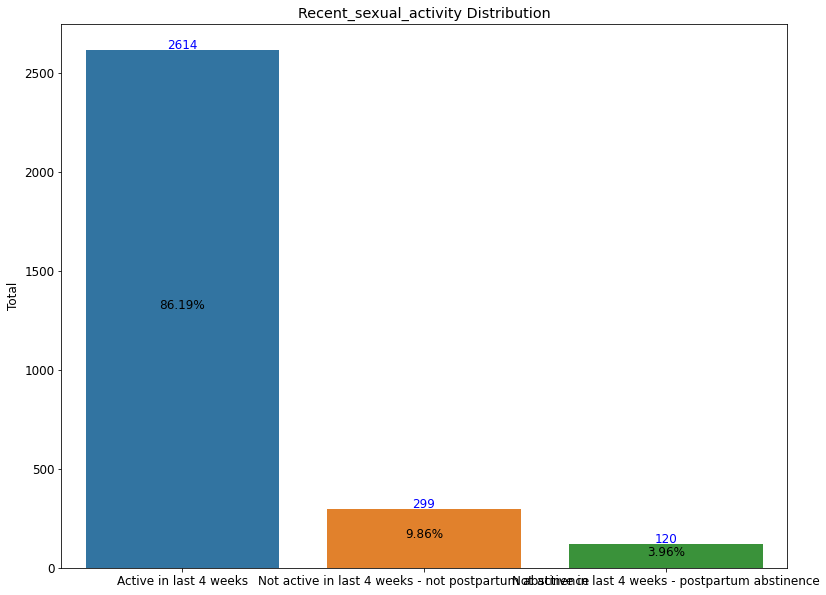

,Total,Percent
Active in last 4 weeks,2614,0.86
Not active in last 4 weeks - not postpartum abstinence,299,0.10
Not active in last 4 weeks - postpartum abstinence,120,0.04


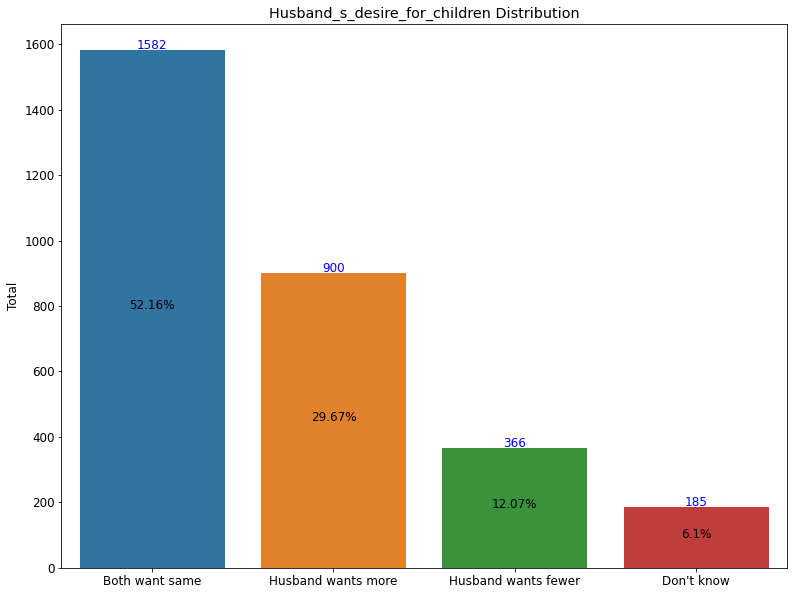

,Total,Percent
Both want same,1582,0.52
Husband wants more,900,0.30
Husband wants fewer,366,0.12
Don't know,185,0.06


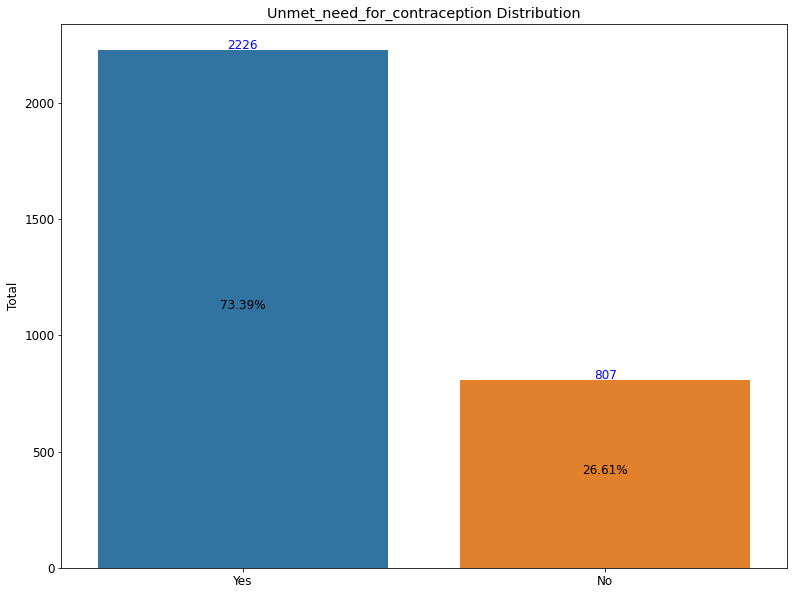

,Total,Percent
Yes,2226,0.73
No,807,0.27


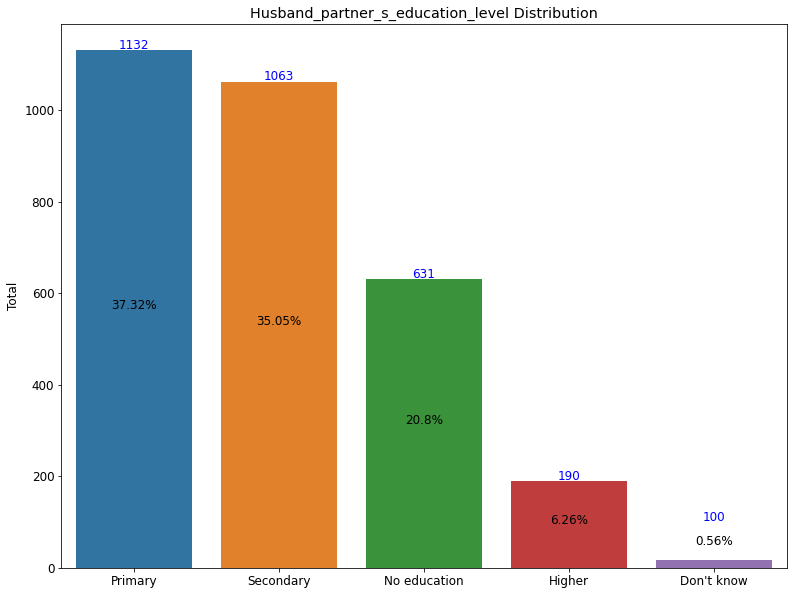

,Total,Percent
Primary,1132,0.37
Secondary,1063,0.35
No education,631,0.21
Higher,190,0.06
Don't know,17,0.01


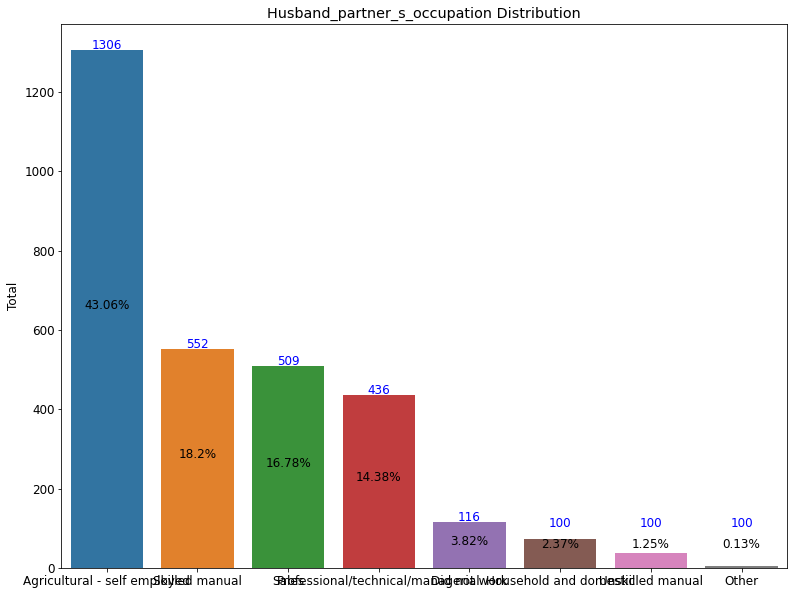

,Total,Percent
Agricultural - self employed,1306,0.43
Skilled manual,552,0.18
Sales,509,0.17
Professional/technical/managerial,436,0.14
Did not work,116,0.04
Household and domestic,72,0.02
Unskilled manual,38,0.01
Other,4,0.00


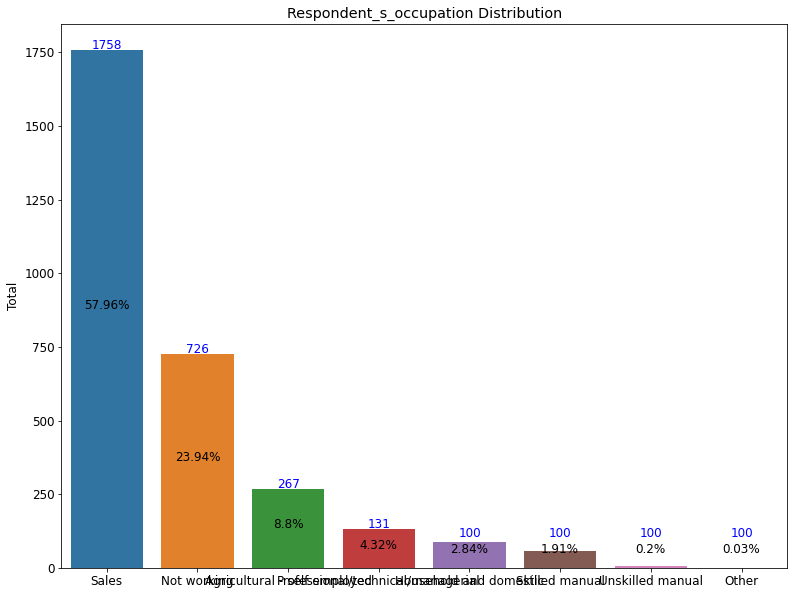

,Total,Percent
Sales,1758,0.58
Not working,726,0.24
Agricultural - self employed,267,0.09
Professional/technical/managerial,131,0.04
Household and domestic,86,0.03
Skilled manual,58,0.02
Unskilled manual,6,0.00
Other,1,0.00


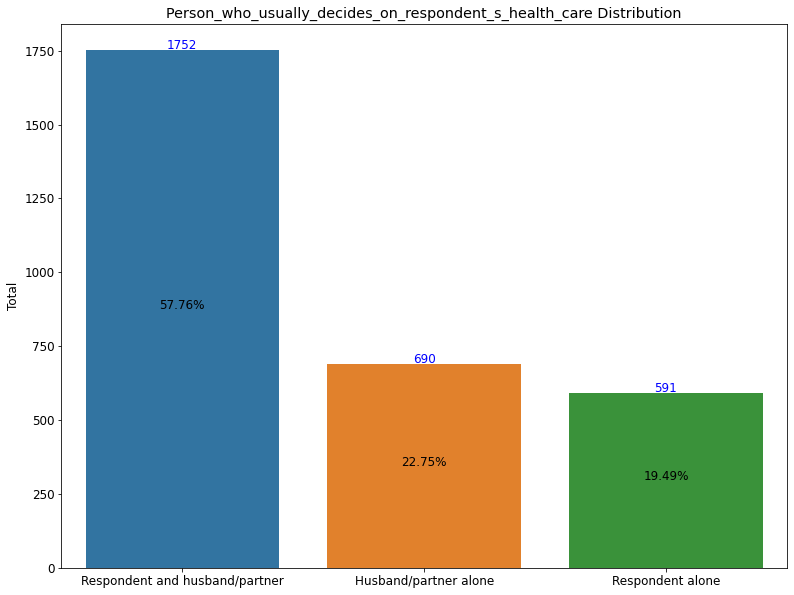

,Total,Percent
Respondent and husband/partner,1752,0.58
Husband/partner alone,690,0.23
Respondent alone,591,0.19


In [389]:
#Show aplot for  categoric succesively
for col in cat_cols:
  result = prob_category(data=df,col=col, abs_value ="Total",rel_value ="Percent", show_plot=True,title=f"{col} Distribution")
  display(result)

##**ANALYSIS**
**As we can see, This dataset is dominated by the following characteristics:** 


* **The most representative regions of the dataset are**

  * **West (20%) with 50% from the air metropolitan area**
  * **Artibonite (11%)**
  * **Northwest (11%)**

* **Geographics** 
  * **2/3 are from rural areas** 


* **Education**

**97% don't get higher than secondary level**
  * **Primary school (39%)**
  * **Secondary school (32)**
  * **No education (26%)**
  * **Higher (3%)**

* **Type Of Contraceptive Method Used**
  * **About 1/3 used injections contraceptive method**

* **Wealth index**
  * **48% are indexed in a poor household class**

* **Religion**

  * **52% are Prostestant**
  * **42% are Catholic**
  * **6% No Religion**

* **Profession**
  * **46% have their husbands working in agriculture**

In [390]:
#Function to find missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [391]:
# Check missing values
missing = missing_values_table(df)
missing

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_of_most_recent_child,190,6.30
Age_of_respondent_at_1st_birth,163,5.40


## 2. OVERVIEW

In [392]:
# Check for duplicated columns
df[df.duplicated()].value_counts()

Series([], dtype: int64)

In [393]:
# Check null values
df.isnull().sum()

Respondent_s_current_age                                  0
Region                                                    0
Type_of_place_of_residence                                0
Highest_educational_level                                 0
Religion                                                  0
                                                         ..
Husband_partner_s_occupation                              0
Respondent_s_occupation                                   0
Husband_partner_s_age                                     0
Person_who_usually_decides_on_respondent_s_health_care    0
Total_lifetime_number_of_sex_partners                     0
Length: 33, dtype: int64

In [394]:
na_val = df.isnull().sum().value_counts()
na_val

0      31
190     1
163     1
dtype: int64

In [395]:
#Fonksyon pou detekte valè ki manke
def na_values_table(df):
        mis_val = df.isna().sum()
        mis_val_percent = 100 * df.isna().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] > 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [396]:
na_values_table(df)

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_of_most_recent_child,190,6.30
Age_of_respondent_at_1st_birth,163,5.40


In [397]:
# replacing na values in Age_of_most_recent_child
df["Age_of_most_recent_child"].fillna(df['Age_of_most_recent_child'].mean(), inplace = True)

In [398]:
# replacing na values in Age_of_respondent_at_1st_birth
df["Age_of_respondent_at_1st_birth"].fillna(df['Age_of_respondent_at_1st_birth'].mean(), inplace = True)

In [399]:
na_values_table(df)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [400]:
df['Unmet_need_for_contraception'].unique()

array(['Yes', 'No'], dtype=object)

  * **There are 1878 observations and 25 features in this dataset**

**There is :**
  * **No Null values**
  * **Missing values**
  * **Duplicated values**

In [401]:
df.dtypes.value_counts()

object     20
int64      11
float64     2
dtype: int64

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Respondent_s_current_age                                3033 non-null   int64  
 1   Region                                                  3033 non-null   object 
 2   Type_of_place_of_residence                              3033 non-null   object 
 3   Highest_educational_level                               3033 non-null   object 
 4   Religion                                                3033 non-null   object 
 5   Number_of_household_members                             3033 non-null   int64  
 6   Number_of_children_5_and_under_in_household             3033 non-null   int64  
 7   Number_of_trips_in_last_12_months                       3033 non-null   int64  
 8   Wealth_index_combined                 

In [403]:
# describe the variables by simple statistic
include =['object', 'float', 'int'] 
df.describe( include = include)

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Contraceptive_use_and_intention,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners
count,3033.00,3033,3033,3033,3033,3033.00,3033.00,3033.00,3033,3033.00,3033.00,3033,3033.00,3033.00,3033,3033,3033,3033,3033,3033,3033,3033.00,3033.00,3033.00,3033,3033,3033,3033,3033,3033,3033.00,3033,3033.00
unique,nan,11,2,4,5,nan,nan,nan,5,nan,nan,7,nan,nan,3,2,2,2,3,3,2,nan,nan,nan,3,4,2,5,8,8,nan,3,nan
top,nan,Artibonite,Rural,Primary,Protestant,nan,nan,nan,Poorest,nan,nan,After period ended,nan,nan,Using_modern_method,No,No,Yes,Disagree,Disagree,No,nan,nan,nan,Active in last 4 weeks,Both want same,Yes,Primary,Agricultural - self employed,Sales,nan,Respondent and husband/partner,nan
freq,nan,357,2067,1180,1559,nan,nan,nan,778,nan,nan,1777,nan,nan,1106,2405,2826,1869,2460,2107,2870,nan,nan,nan,2614,1582,2226,1132,1306,1758,nan,1752,nan
mean,34.14,NaN,NaN,NaN,NaN,5.59,1.00,1.29,NaN,0.78,20.83,NaN,4.00,4.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,21.09,17.15,NaN,NaN,NaN,NaN,NaN,NaN,39.84,NaN,2.27
std,8.33,NaN,NaN,NaN,NaN,2.28,0.95,4.67,NaN,0.81,4.30,NaN,3.16,4.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,4.93,3.25,NaN,NaN,NaN,NaN,NaN,NaN,9.73,NaN,1.48
min,16.00,NaN,NaN,NaN,NaN,2.00,0.00,0.00,NaN,0.00,11.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,1.00
25%,27.00,NaN,NaN,NaN,NaN,4.00,0.00,0.00,NaN,0.00,18.00,NaN,2.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,18.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,32.00,NaN,1.00
50%,34.00,NaN,NaN,NaN,NaN,5.00,1.00,0.00,NaN,1.00,20.00,NaN,3.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,20.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,39.00,NaN,2.00
75%,41.00,NaN,NaN,NaN,NaN,7.00,2.00,1.00,NaN,1.00,23.00,NaN,6.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,24.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN,47.00,NaN,3.00


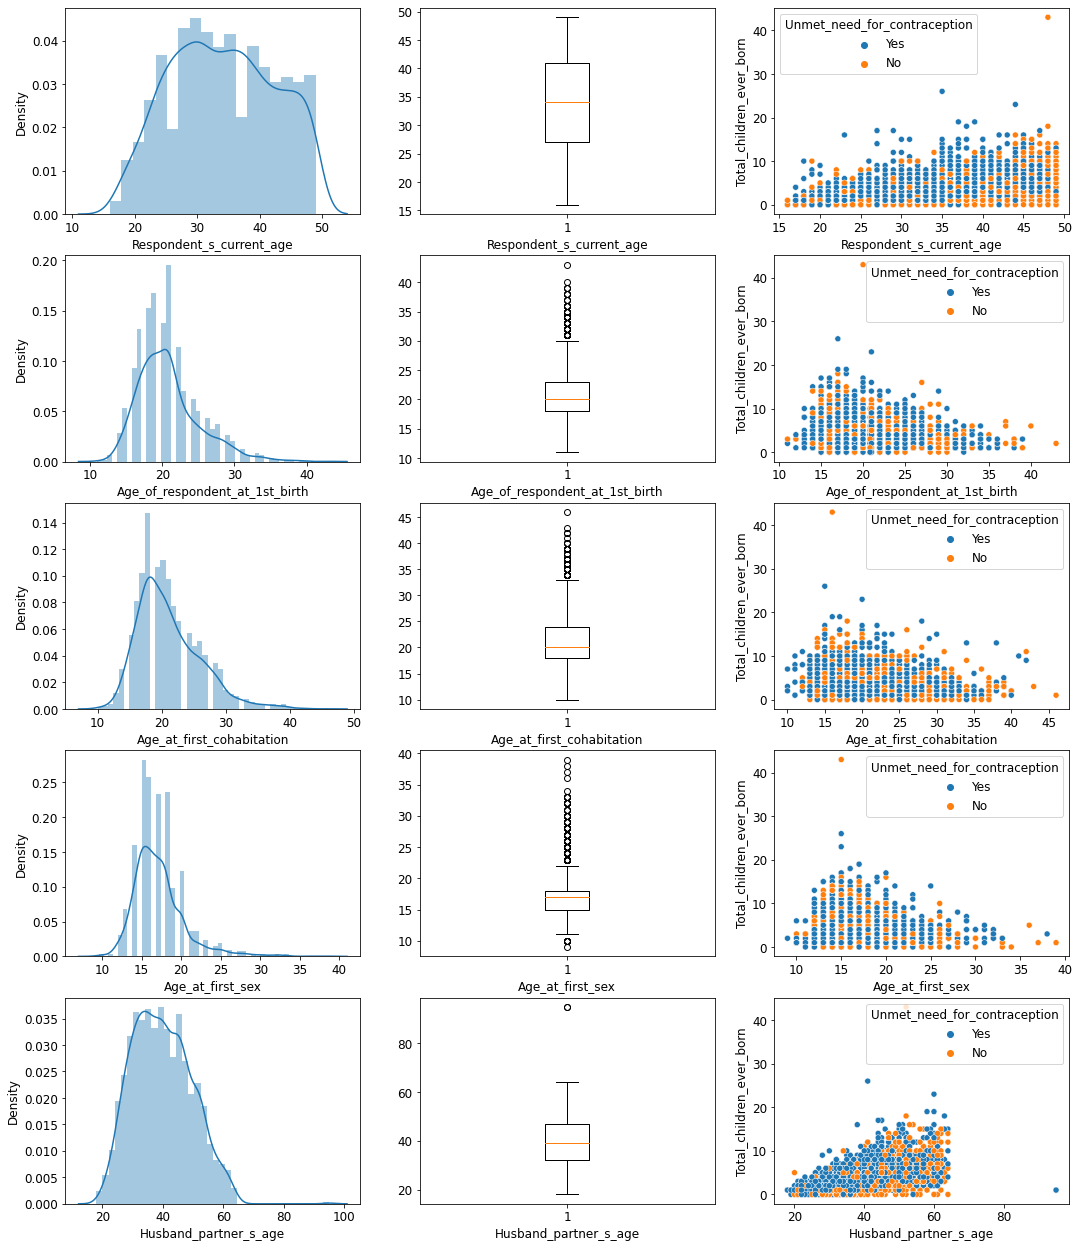

In [404]:
#  Numerical Data
con = ['Respondent_s_current_age',
 'Age_of_respondent_at_1st_birth',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Unmet_need_for_contraception')
    c = c + 1

In [405]:
df.columns.tolist()

['Respondent_s_current_age',
 'Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Contraceptive_use_and_intention',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupatio

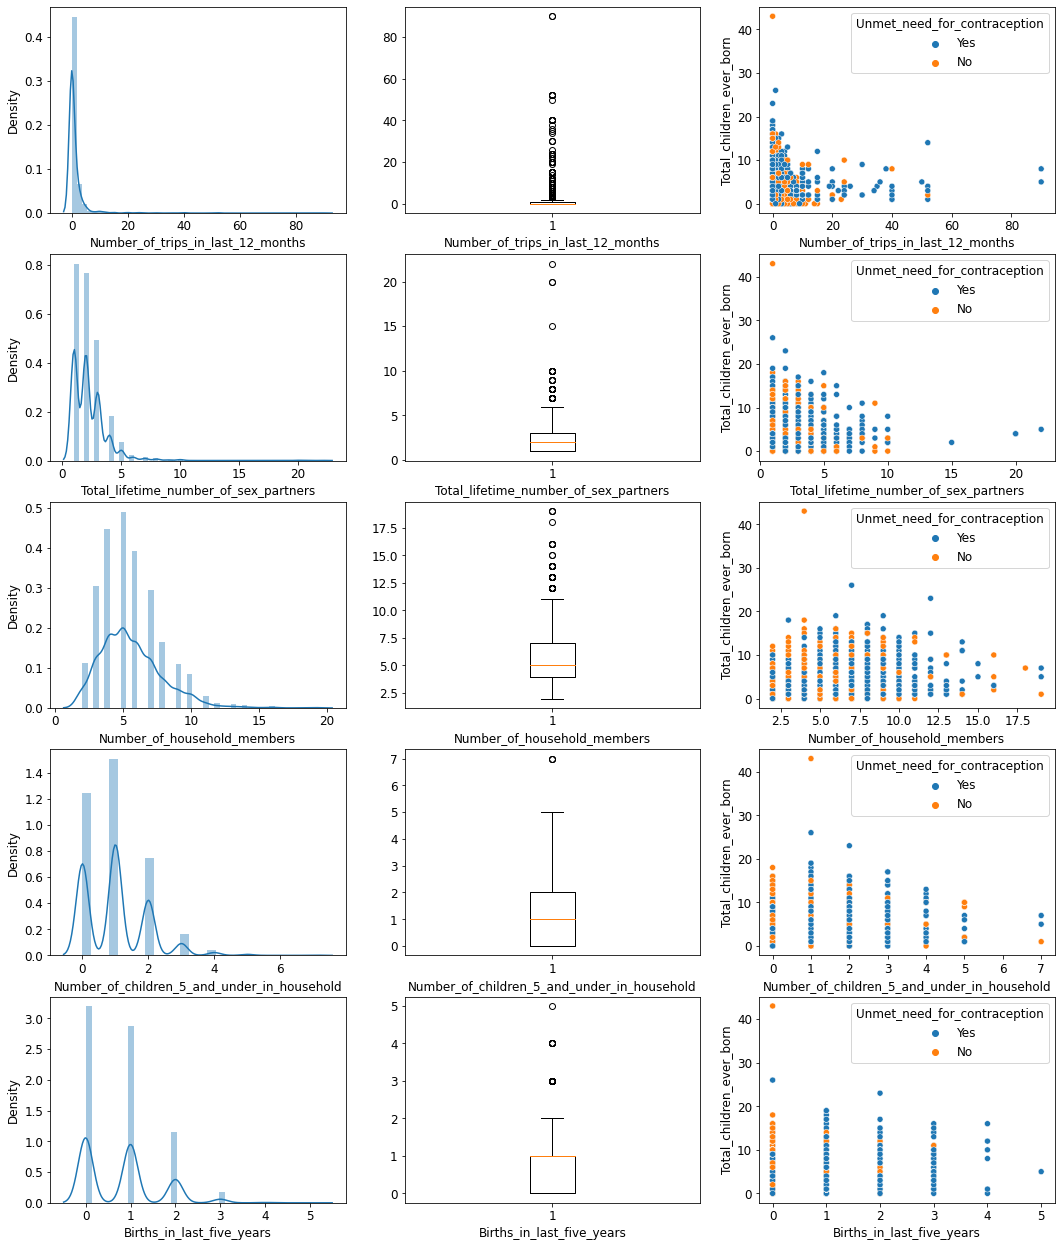

In [406]:
#  Numerical Data
con = ['Number_of_trips_in_last_12_months',
 'Total_lifetime_number_of_sex_partners',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Unmet_need_for_contraception')
    c = c + 1

In [407]:
method = df.copy(deep=True)
# count column values
for col in method.columns:
  print(f"{col} = {df[col].nunique()}")

Respondent_s_current_age = 34
Region = 11
Type_of_place_of_residence = 2
Highest_educational_level = 4
Religion = 5
Number_of_household_members = 17
Number_of_children_5_and_under_in_household = 7
Number_of_trips_in_last_12_months = 30
Wealth_index_combined = 5
Births_in_last_five_years = 6
Age_of_respondent_at_1st_birth = 32
Knowledge_of_ovulatory_cycle = 7
Total_children_ever_born = 23
Age_of_most_recent_child = 31
Contraceptive_use_and_intention = 3
Heard_family_planning_on_radio_last_few_months = 2
Heard_family_planning_on_TV_last_few_months = 2
Visited_health_facility_last_12_months = 2
Contraception_is_woman_s_business_man_should_not_worry = 3
Women_who_use_contraception_become_promiscuous = 3
Covered_by_health_insurance = 2
More_than_once_unions = 2
Age_at_first_cohabitation = 35
Age_at_first_sex = 30
Recent_sexual_activity = 3
Husband_s_desire_for_children = 4
Unmet_need_for_contraception = 2
Husband_partner_s_education_level = 5
Husband_partner_s_occupation = 8
Respondent_s_oc

##**DATA TRANSFORMATION**

In [408]:
binary_col = [col for col in method.columns if df[col].nunique()==2]
binary_col

['Type_of_place_of_residence',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Unmet_need_for_contraception']

In [409]:
multi_col = [col for col in method.columns if df[col].nunique()>2]
multi_col

['Respondent_s_current_age',
 'Region',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Contraceptive_use_and_intention',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Husband_partner_s_age',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners']

In [410]:
method[multi_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,3033.00,34.14,8.33,16.00,27.00,34.00,41.00,49.00
Number_of_household_members,3033.00,5.59,2.28,2.00,4.00,5.00,7.00,19.00
Number_of_children_5_and_under_in_household,3033.00,1.00,0.95,0.00,0.00,1.00,2.00,7.00
Number_of_trips_in_last_12_months,3033.00,1.29,4.67,0.00,0.00,0.00,1.00,90.00
Births_in_last_five_years,3033.00,0.78,0.81,0.00,0.00,1.00,1.00,5.00
Age_of_respondent_at_1st_birth,3033.00,20.83,4.30,11.00,18.00,20.00,23.00,43.00
Total_children_ever_born,3033.00,4.00,3.16,0.00,2.00,3.00,6.00,43.00
Age_of_most_recent_child,3033.00,4.91,4.85,0.00,1.00,4.00,7.00,30.00
Age_at_first_cohabitation,3033.00,21.09,4.93,10.00,18.00,20.00,24.00,46.00
Age_at_first_sex,3033.00,17.15,3.25,9.00,15.00,17.00,18.00,39.00


In [411]:
method[binary_col].describe()

,More_than_once_unions
count,3033.00
mean,0.22
std,0.41
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [412]:
def meancol(col):
  for col in method.columns:
    method[col]=pd.cut(df[col],2,labels=['Young','No_Young'])
    return method[col]

In [413]:
method['Respondent_s_current_age']=pd.cut(method['Respondent_s_current_age'],2,labels=['Low','High'])
method['Number_of_household_members']=pd.cut(method['Number_of_household_members'],2,labels=['Low','High'])
method['Number_of_children_5_and_under_in_household']=pd.cut(method['Number_of_children_5_and_under_in_household'],2,labels=['Low','High'])
method['Number_of_trips_in_last_12_months']=pd.cut(method['Number_of_trips_in_last_12_months'],2,labels=['Low','High'])
method['Births_in_last_five_years']=pd.cut(method['Births_in_last_five_years'],2,labels=['Low','High'])
method['Age_of_respondent_at_1st_birth']=pd.cut(method['Age_of_respondent_at_1st_birth'],2,labels=['Low','High'])
method['Total_children_ever_born']=pd.cut(method['Total_children_ever_born'],2,labels=['Low','High'])
method['Age_of_most_recent_child']=pd.cut(method['Age_of_most_recent_child'],2,labels=['Low','High'])
method['Age_at_first_cohabitation']=pd.cut(method['Age_at_first_cohabitation'],2,labels=['Low','High'])
method['Age_at_first_sex']=pd.cut(method['Age_at_first_sex'],2,labels=['Low','High'])
method['Husband_partner_s_age']=pd.cut(method['Husband_partner_s_age'],2,labels=['Low','High'])
method['Total_lifetime_number_of_sex_partners']=pd.cut(method['Total_lifetime_number_of_sex_partners'],2,labels=['Low','High'])

In [414]:
# Descriptive Analysis of qualitative variables
var = df[binary_col].describe(include=[object]).T
#varcat['%'] = varcat['freq']/varcat['count']*100
var

,count,unique,top,freq
Type_of_place_of_residence,3033,2,Rural,2067
Heard_family_planning_on_radio_last_few_months,3033,2,No,2405
Heard_family_planning_on_TV_last_few_months,3033,2,No,2826
Visited_health_facility_last_12_months,3033,2,Yes,1869
Covered_by_health_insurance,3033,2,No,2870
Unmet_need_for_contraception,3033,2,Yes,2226


In [415]:
method.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_trips_in_last_12_months,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Total_children_ever_born,Age_of_most_recent_child,Contraceptive_use_and_intention,Heard_family_planning_on_radio_last_few_months,Heard_family_planning_on_TV_last_few_months,Visited_health_facility_last_12_months,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Age_at_first_sex,Recent_sexual_activity,Husband_s_desire_for_children,Unmet_need_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Person_who_usually_decides_on_respondent_s_health_care,Total_lifetime_number_of_sex_partners
0,Low,Sud,Rural,Primary,Catholic,Low,Low,Low,Middle,High,Low,After period ended,Low,Low,Non_user _intends to use later,No,No,Yes,Disagree,Disagree,No,0,Low,Low,Active in last 4 weeks,Husband wants more,Yes,Primary,Professional/technical/managerial,Sales,Low,Husband/partner alone,Low
1,High,Sud,Rural,Higher,Catholic,Low,Low,Low,Middle,Low,High,Middle of the cycle,Low,Low,Using_modern_method,No,No,Yes,Agree,Disagree,No,0,High,Low,Active in last 4 weeks,Both want same,Yes,Higher,Professional/technical/managerial,Professional/technical/managerial,Low,Respondent and husband/partner,Low
2,High,Sud,Rural,Secondary,Protestant,Low,Low,Low,Middle,Low,High,After period ended,Low,Low,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,Low,Low,Active in last 4 weeks,Both want same,Yes,Secondary,Professional/technical/managerial,Not working,Low,Husband/partner alone,Low
3,High,Sud,Rural,Secondary,Catholic,Low,Low,Low,Middle,Low,Low,After period ended,Low,Low,Using_modern_method,No,No,Yes,Disagree,Disagree,No,0,Low,Low,Active in last 4 weeks,Husband wants more,Yes,Secondary,Skilled manual,Sales,Low,Husband/partner alone,Low
4,High,Sud,Rural,Secondary,Catholic,Low,Low,Low,Poorer,Low,Low,After period ended,Low,Low,Using_modern_method,No,No,No,Agree,Agree,No,0,Low,Low,Active in last 4 weeks,Husband wants more,Yes,No education,Agricultural - self employed,Sales,Low,Respondent and husband/partner,Low


In [416]:
method=pd.get_dummies(method)
method.head()

,More_than_once_unions,Respondent_s_current_age_Low,Respondent_s_current_age_High,Region_Aire Metropolitaine,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Rural,Type_of_place_of_residence_Urban,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Number_of_household_members_Low,Number_of_household_members_High,Number_of_children_5_and_under_in_household_Low,Number_of_children_5_and_under_in_household_High,Number_of_trips_in_last_12_months_Low,Number_of_trips_in_last_12_months_High,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Births_in_last_five_years_Low,Births_in_last_five_years_High,Age_of_respondent_at_1st_birth_Low,Age_of_respondent_at_1st_birth_High,Knowledge_of_ovulatory_cycle_After period ended,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_Don't know,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Knowledge_of_ovulatory_cycle_Other,Total_children_ever_born_Low,Total_children_ever_born_High,Age_of_most_recent_child_Low,Age_of_most_recent_child_High,Contraceptive_use_and_intention_Does_not_intend to use,Contraceptive_use_and_intention_Non_user _intends to use later,Contraceptive_use_and_intention_Using_modern_method,Heard_family_planning_on_radio_last_few_months_No,Heard_family_planning_on_radio_last_few_months_Yes,Heard_family_planning_on_TV_last_few_months_No,Heard_family_planning_on_TV_last_few_months_Yes,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Contraception_is_woman_s_business_man_should_not_worry_Agree,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Contraception_is_woman_s_business_man_should_not_worry_Don't know,Women_who_use_contraception_become_promiscuous_Agree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_No,Covered_by_health_insurance_Yes,Age_at_first_cohabitation_Low,Age_at_first_cohabitation_High,Age_at_first_sex_Low,Age_at_first_sex_High,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Husband_s_desire_for_children_Both want same,Husband_s_desire_for_children_Don't know,Husband_s_desire_for_children_Husband wants fewer,Husband_s_desire_for_children_Husband wants more,Unmet_need_for_contraception_No,Unmet_need_for_contraception_Yes,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Agricultural - self employed,Husband_partner_s_occupation_Did not work,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Husband_partner_s_age_Low,Husband_partner_s_age_High,Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone,Person_

In [417]:
method.columns.tolist()

['More_than_once_unions',
 'Respondent_s_current_age_Low',
 'Respondent_s_current_age_High',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_Low',
 'Number_of_household_members_High',
 'Number_of_children_5_and_under_in_household_Low',
 'Number_of_children_5_and_under_in_household_High',
 'Number_of_trips_in_last_12_months_Low',
 'Number_of_trips_in_last_12_months_High',
 'Wealth_index_combined_Middle',
 'Wealth_index_combined_Poorer',
 'Wealt

In [418]:
dataselected=['More_than_once_unions',
 'Respondent_s_current_age_Low',
 'Respondent_s_current_age_High',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_Low',
 'Number_of_household_members_High',
 'Number_of_children_5_and_under_in_household_Low',
 'Number_of_children_5_and_under_in_household_High',
 'Number_of_trips_in_last_12_months_Low',
 'Number_of_trips_in_last_12_months_High',
 'Wealth_index_combined_Middle',
 'Wealth_index_combined_Poorer',
 'Wealth_index_combined_Poorest',
 'Wealth_index_combined_Richer',
 'Wealth_index_combined_Richest',
 'Births_in_last_five_years_Low',
 'Births_in_last_five_years_High',
 'Age_of_respondent_at_1st_birth_Low',
 'Age_of_respondent_at_1st_birth_High',
 'Knowledge_of_ovulatory_cycle_After period ended',
 'Knowledge_of_ovulatory_cycle_At any time',
 'Knowledge_of_ovulatory_cycle_Before period begins',
 "Knowledge_of_ovulatory_cycle_Don't know",
 'Knowledge_of_ovulatory_cycle_During her period',
 'Knowledge_of_ovulatory_cycle_Middle of the cycle',
 'Knowledge_of_ovulatory_cycle_Other',
 'Total_children_ever_born_Low',
 'Total_children_ever_born_High',
 'Age_of_most_recent_child_Low',
 'Age_of_most_recent_child_High',
 'Contraceptive_use_and_intention_Does_not_intend to use',
 'Contraceptive_use_and_intention_Non_user _intends to use later',
 'Contraceptive_use_and_intention_Using_modern_method',
 'Heard_family_planning_on_radio_last_few_months_No',
 'Heard_family_planning_on_radio_last_few_months_Yes',
 'Heard_family_planning_on_TV_last_few_months_No',
 'Heard_family_planning_on_TV_last_few_months_Yes',
 'Visited_health_facility_last_12_months_No',
 'Visited_health_facility_last_12_months_Yes',
 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
 'Contraception_is_woman_s_business_man_should_not_worry_Disagree',
 "Contraception_is_woman_s_business_man_should_not_worry_Don't know",
 'Women_who_use_contraception_become_promiscuous_Agree',
 'Women_who_use_contraception_become_promiscuous_Disagree',
 "Women_who_use_contraception_become_promiscuous_Don't know",
 'Covered_by_health_insurance_No',
 'Covered_by_health_insurance_Yes',
 'Age_at_first_cohabitation_Low',
 'Age_at_first_cohabitation_High',
 'Age_at_first_sex_Low',
 'Age_at_first_sex_High',
 'Recent_sexual_activity_Active in last 4 weeks',
 'Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence',
 'Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence',
 'Husband_s_desire_for_children_Both want same',
 "Husband_s_desire_for_children_Don't know",
 'Husband_s_desire_for_children_Husband wants fewer',
 'Husband_s_desire_for_children_Husband wants more',
 'Unmet_need_for_contraception_No',
 'Unmet_need_for_contraception_Yes',
 "Husband_partner_s_education_level_Don't know",
 'Husband_partner_s_education_level_Higher',
 'Husband_partner_s_education_level_No education',
 'Husband_partner_s_education_level_Primary',
 'Husband_partner_s_education_level_Secondary',
 'Husband_partner_s_occupation_Agricultural - self employed',
 'Husband_partner_s_occupation_Did not work',
 'Husband_partner_s_occupation_Household and domestic',
 'Husband_partner_s_occupation_Other',
 'Husband_partner_s_occupation_Professional/technical/managerial',
 'Husband_partner_s_occupation_Sales',
 'Husband_partner_s_occupation_Skilled manual',
 'Husband_partner_s_occupation_Unskilled manual',
 'Respondent_s_occupation_Agricultural - self employed',
 'Respondent_s_occupation_Household and domestic',
 'Respondent_s_occupation_Not working',
 'Respondent_s_occupation_Other',
 'Respondent_s_occupation_Professional/technical/managerial',
 'Respondent_s_occupation_Sales',
 'Respondent_s_occupation_Skilled manual',
 'Respondent_s_occupation_Unskilled manual',
 'Husband_partner_s_age_Low',
 'Husband_partner_s_age_High',
 'Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent and husband/partner',
 'Total_lifetime_number_of_sex_partners_Low',
 'Total_lifetime_number_of_sex_partners_High']

In [419]:
# Installing package for colored text
import sys
from termcolor import colored, cprint

In [420]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, method.Unmet_need_for_contraception_Yes))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [421]:
for i in method[dataselected].columns:
  chisq(method[i],i)

We fail to reject the Null Hypothesis for More_than_once_unions 0.050781079255928355
We can reject the Null Hypothesis for Respondent_s_current_age_Low  9.31204707594201e-11
We can reject the Null Hypothesis for Respondent_s_current_age_High  9.312047075941973e-11
We fail to reject the Null Hypothesis for Region_Aire Metropolitaine 0.49677213212937543
We can reject the Null Hypothesis for Region_Artibonite  0.012850386085602565
We fail to reject the Null Hypothesis for Region_Centre 0.7304026627564006
We fail to reject the Null Hypothesis for Region_Grand'Anse 0.891753926576409
We fail to reject the Null Hypothesis for Region_Nippes 0.15115100027180597
We fail to reject the Null Hypothesis for Region_Nord 0.3707912539803546
We fail to reject the Null Hypothesis for Region_Nord-Est 0.5041153509180474
We fail to reject the Null Hypothesis for Region_Nord-Ouest 0.3615672569604349
We fail to reject the Null Hypothesis for Region_Rest-Ouest 0.06250114979404728
We fail to reject the Null Hyp

In [422]:
datamodel=['Respondent_s_current_age_Low', 'Respondent_s_current_age_High',
           'Region_Artibonite', 'Highest_educational_level_Higher','Highest_educational_level_No education',
           'Highest_educational_level_Primary', 'Religion_Catholic', 'Religion_Protestant', 'Wealth_index_combined_Richest',
           'Births_in_last_five_years_Low',
           'Births_in_last_five_years_High',
           'Age_of_respondent_at_1st_birth_Low',
           'Age_of_respondent_at_1st_birth_High',
           'Age_of_most_recent_child_Low',
           'Age_of_most_recent_child_High',
            'Contraceptive_use_and_intention_Does_not_intend to use',
           'Contraceptive_use_and_intention_Non_user _intends to use later',
           'Contraceptive_use_and_intention_Using_modern_method',
           'Visited_health_facility_last_12_months_No',
           'Visited_health_facility_last_12_months_Yes',
           'Age_at_first_cohabitation_Low', 'Age_at_first_cohabitation_High',
           'Age_at_first_sex_Low', 'Age_at_first_sex_High',
           'Husband_partner_s_education_level_Higher',
           'Husband_partner_s_education_level_No education',
           'Husband_partner_s_education_level_Primary',
           'Husband_partner_s_education_level_Secondary',
           'Recent_sexual_activity_Active in last 4 weeks',
           'Respondent_s_occupation_Not working',
           'Respondent_s_occupation_Professional/technical/managerial',
           'Husband_partner_s_age_Low',
           'Husband_partner_s_age_High',
           'Unmet_need_for_contraception_Yes']

In [423]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [424]:
def factor(data='data'):

  vif_data = pd.DataFrame() 
  vif_data["feature"] = data.columns 
  
  vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                          for i in range(len(data.columns))] 
  
  return vif_data.query('VIF >= 5')

In [425]:
method.shape

(3033, 109)

In [426]:
linear = factor(method)
display(linear)
display(linear.value_counts().sum())

,feature,VIF
1,Respondent_s_current_age_Low,inf
2,Respondent_s_current_age_High,inf
3,Region_Aire Metropolitaine,inf
4,Region_Artibonite,inf
5,Region_Centre,inf
...,...,...
104,Person_who_usually_decides_on_respondent_s_hea...,inf
105,Person_who_usually_decides_on_respondent_s_hea...,inf
106,Person_who_usually_decides_on_respondent_s_hea...,inf
107,Total_lifetime_number_of_sex_partners_Low,inf


108

In [427]:
datalist=['Respondent_s_current_age_Low', 'Respondent_s_current_age_High',
       'Region_Aire Metropolitaine', 'Region_Artibonite', 'Region_Centre',
       "Region_Grand'Anse", 'Region_Nippes', 'Region_Nord',
       'Region_Nord-Est', 'Region_Nord-Ouest', 'Region_Rest-Ouest',
       'Region_Sud', 'Region_Sud-Est', 'Type_of_place_of_residence_Rural',
       'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher',
       'Highest_educational_level_No education',
       'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic',
       'Religion_No religion', 'Religion_Other', 'Religion_Protestant',
       'Religion_Vaudousant', 'Number_of_household_members_Low',
       'Number_of_household_members_High',
       'Number_of_children_5_and_under_in_household_Low',
       'Number_of_children_5_and_under_in_household_High',
       'Number_of_trips_in_last_12_months_Low',
       'Number_of_trips_in_last_12_months_High',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer',
       'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Births_in_last_five_years_Low',
       'Births_in_last_five_years_High',
       'Age_of_respondent_at_1st_birth_Low',
       'Age_of_respondent_at_1st_birth_High',
       'Knowledge_of_ovulatory_cycle_After period ended',
       'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins',
       "Knowledge_of_ovulatory_cycle_Don't know",
       'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle',
       'Knowledge_of_ovulatory_cycle_Other',
       'Total_children_ever_born_Low', 'Total_children_ever_born_High',
       'Age_of_most_recent_child_Low', 'Age_of_most_recent_child_High',
       'Contraceptive_use_and_intention_Does_not_intend to use',
       'Contraceptive_use_and_intention_Non_user _intends to use later',
       'Contraceptive_use_and_intention_Using_modern_method',
       'Heard_family_planning_on_radio_last_few_months_No',
       'Heard_family_planning_on_radio_last_few_months_Yes',
       'Heard_family_planning_on_TV_last_few_months_No',
       'Heard_family_planning_on_TV_last_few_months_Yes',
       'Visited_health_facility_last_12_months_No',
       'Visited_health_facility_last_12_months_Yes',
       'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree',
       "Contraception_is_woman_s_business_man_should_not_worry_Don't know",
       'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree',
       "Women_who_use_contraception_become_promiscuous_Don't know",
       'Covered_by_health_insurance_No',
       'Covered_by_health_insurance_Yes', 'Age_at_first_cohabitation_Low',
       'Age_at_first_cohabitation_High', 'Age_at_first_sex_Low',
       'Age_at_first_sex_High',
       'Recent_sexual_activity_Active in last 4 weeks',
       'Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence',
       'Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence',
       'Husband_s_desire_for_children_Both want same',
       "Husband_s_desire_for_children_Don't know",
       'Husband_s_desire_for_children_Husband wants fewer',
       'Husband_s_desire_for_children_Husband wants more',
       'Unmet_need_for_contraception_No',
       'Unmet_need_for_contraception_Yes',
       "Husband_partner_s_education_level_Don't know",
       'Husband_partner_s_education_level_Higher',
       'Husband_partner_s_education_level_No education',
       'Husband_partner_s_education_level_Primary',
       'Husband_partner_s_education_level_Secondary',
       'Husband_partner_s_occupation_Agricultural - self employed',
       'Husband_partner_s_occupation_Did not work',
       'Husband_partner_s_occupation_Household and domestic',
       'Husband_partner_s_occupation_Other',
       'Husband_partner_s_occupation_Professional/technical/managerial',
       'Husband_partner_s_occupation_Sales',
       'Husband_partner_s_occupation_Skilled manual',
       'Husband_partner_s_occupation_Unskilled manual',
       'Respondent_s_occupation_Agricultural - self employed',
       'Respondent_s_occupation_Household and domestic',
       'Respondent_s_occupation_Not working',
       'Respondent_s_occupation_Other',
       'Respondent_s_occupation_Professional/technical/managerial',
       'Respondent_s_occupation_Sales',
       'Respondent_s_occupation_Skilled manual',
       'Respondent_s_occupation_Unskilled manual',
       'Husband_partner_s_age_Low', 'Husband_partner_s_age_High',
       'Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone',
       'Person_who_usually_decides_on_respondent_s_health_care_Respondent alone',
       'Person_who_usually_decides_on_respondent_s_health_care_Respondent and husband/partner',
       'Total_lifetime_number_of_sex_partners_Low',
       'Total_lifetime_number_of_sex_partners_High']

In [428]:
cate_cols=['Respondent_s_current_age_Low', 'Respondent_s_current_age_High', 'Highest_educational_level_Higher','Highest_educational_level_No education',
           'Highest_educational_level_Primary', 'Religion_Catholic', 'Religion_Protestant', 'Wealth_index_combined_Richest',
           'Births_in_last_five_years_Low',
           'Births_in_last_five_years_High',
           'Age_of_respondent_at_1st_birth_Low',
           'Age_of_respondent_at_1st_birth_High',
           'Age_of_most_recent_child_Low',
           'Age_of_most_recent_child_High',
            'Contraceptive_use_and_intention_Does_not_intend to use',
           'Contraceptive_use_and_intention_Non_user _intends to use later',
           'Contraceptive_use_and_intention_Using_modern_method',
           'Visited_health_facility_last_12_months_No',
           'Visited_health_facility_last_12_months_Yes',
           'Age_at_first_cohabitation_Low', 'Age_at_first_cohabitation_High',
           'Age_at_first_sex_Low', 'Age_at_first_sex_High',
           'Husband_partner_s_education_level_Higher',
           'Husband_partner_s_education_level_No education',
           'Husband_partner_s_education_level_Primary',
           'Husband_partner_s_education_level_Secondary',
           'Recent_sexual_activity_Active in last 4 weeks',
           'Respondent_s_occupation_Not working',
           'Respondent_s_occupation_Professional/technical/managerial',
           'Husband_partner_s_age_Low',
           'Husband_partner_s_age_High']

In [429]:
len(cate_cols)

32

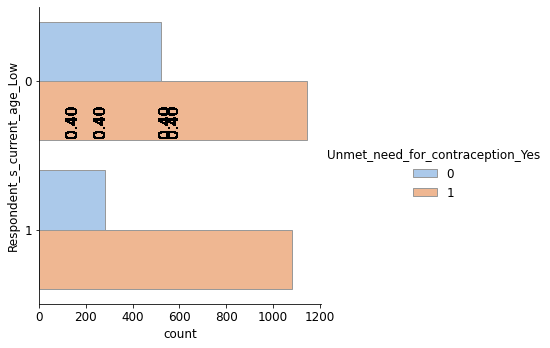

In [430]:
g = sns.catplot(y="Respondent_s_current_age_Low", hue="Unmet_need_for_contraception_Yes", kind="count",
            palette="pastel", edgecolor=".6",
            data=method)
ax=g.ax 
def annotateBars(columns, ax=ax): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=15, color='black', rotation=90, xytext=(0, 20),
         textcoords='offset points')  


plot = method.apply(annotateBars, ax=ax, axis=1)

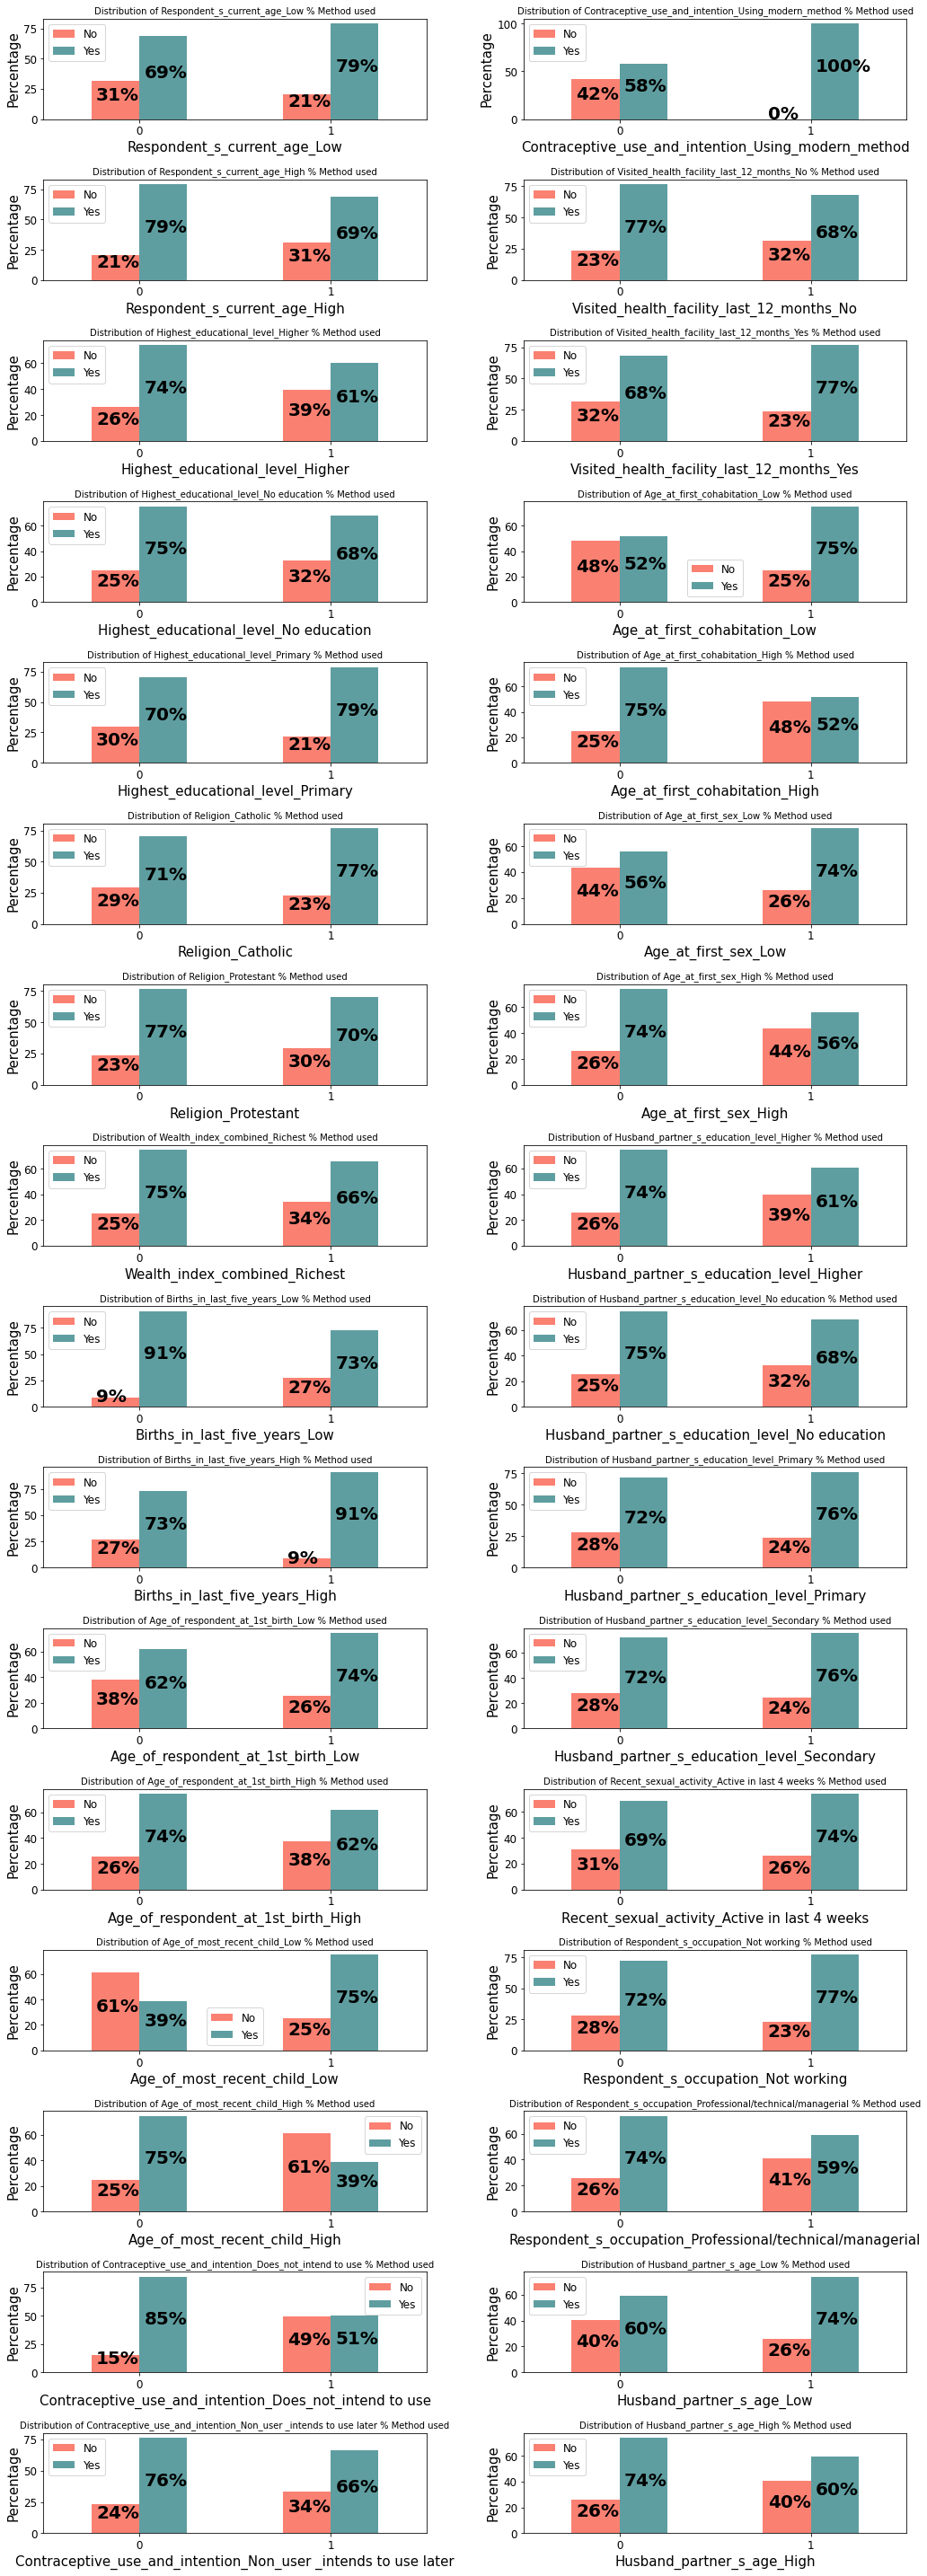

In [431]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 16,ncols = 2,figsize = (15,40))

for i,feature in enumerate(cate_cols):
    if i < 16:
        ax = method.groupby([feature,'Unmet_need_for_contraception_Yes']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 16 and i < 32:
        ax = method.groupby([feature,'Unmet_need_for_contraception_Yes']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-16,1])
    
    ax.set_title("Distribution of {} % Method used".format(feature), fontsize = 10)
    ax.set_ylabel("Percentage", fontsize=15)
    ax.set_xlabel("{}".format(feature), fontsize=15)
    ax.legend(["No", "Yes"], fontsize=12)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=1.5, fontsize=12)

plt.tight_layout()
plt.show()

In [432]:
dfliste=['Respondent_s_current_age',
           'Highest_educational_level',
           'Religion', 
           'Wealth_index_combined',
           'Births_in_last_five_years',
           'Age_of_respondent_at_1st_birth',
           'Age_of_most_recent_child',
           'Visited_health_facility_last_12_months',
           'Age_at_first_cohabitation',
           'Age_at_first_sex',
           'Husband_partner_s_education_level',
           'Recent_sexual_activity',
           'Respondent_s_occupation',
           'Respondent_s_occupation',
           'Husband_partner_s_age',
           'Unmet_need_for_contraception']

In [433]:
df=df[dfliste]

In [434]:
# Find the average values of all the columns for employee left or stayed
df.groupby('Unmet_need_for_contraception').mean().T

Unmet_need_for_contraception,No,Yes
Respondent_s_current_age,36.84,33.16
Births_in_last_five_years,0.37,0.93
Age_of_respondent_at_1st_birth,21.36,20.64
Age_of_most_recent_child,7.22,4.08
Age_at_first_cohabitation,22.27,20.67
Age_at_first_sex,17.56,17.00
Husband_partner_s_age,42.26,38.96


In [435]:
df.head()

,Respondent_s_current_age,Highest_educational_level,Religion,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Age_of_most_recent_child,Visited_health_facility_last_12_months,Age_at_first_cohabitation,Age_at_first_sex,Husband_partner_s_education_level,Recent_sexual_activity,Respondent_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Unmet_need_for_contraception
0,31,Primary,Catholic,Middle,3,19.00,1.00,Yes,27,15,Primary,Active in last 4 weeks,Sales,Sales,31,Yes
1,38,Higher,Catholic,Middle,1,31.00,3.00,Yes,29,18,Higher,Active in last 4 weeks,Professional/technical/managerial,Professional/technical/managerial,39,Yes
2,38,Secondary,Protestant,Middle,1,28.00,1.00,Yes,28,24,Secondary,Active in last 4 weeks,Not working,Not working,36,Yes
3,35,Secondary,Catholic,Middle,0,23.00,7.00,Yes,22,18,Secondary,Active in last 4 weeks,Sales,Sales,42,Yes
4,37,Secondary,Catholic,Poorer,1,18.00,3.00,No,18,17,No education,Active in last 4 weeks,Sales,Sales,53,Yes


In [436]:
df=pd.get_dummies(df)
df.head()

,Respondent_s_current_age,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Age_of_most_recent_child,Age_at_first_cohabitation,Age_at_first_sex,Husband_partner_s_age,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_No,Visited_health_facility_last_12_months_Yes,Husband_partner_s_education_level_Don't know,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Recent_sexual_activity_Active in last 4 weeks,Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence,Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Respondent_s_occupation_Agricultural - self employed,Respondent_s_occupation_Household and domestic,Respondent_s_occupation_Not working,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales,Respondent_s_occupation_Skilled manual,Respondent_s_occupation_Unskilled manual,Unmet_need_for_contraception_No,Unmet_need_for_contraception_Yes
0,31,3,19.00,1.00,27,15,31,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,38,1,31.00,3.00,29,18,39,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,38,1,28.00,1.00,28,24,36,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,35,0,23.00,7.00,22,18,42,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,37,1,18.00,3.00,18,17,53,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [437]:
df = df.drop('Unmet_need_for_contraception_No', axis=1)

In [438]:
import statsmodels.api as sm
X = df.drop('Unmet_need_for_contraception_Yes', axis=1)
y = df['Unmet_need_for_contraception_Yes']

In [439]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (2123, 47) 
X_test: (910, 47) 
y_train: (2123,) 
y_test: (910,)


In [440]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('After OverSampling : the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling : the shape of train_y: {} \n'.format(y_train_smote.shape))
 
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 1569
Before OverSampling, counts of label '0': 554 

After OverSampling : the shape of train_X: (3138, 47)
After OverSampling : the shape of train_y: (3138,) 

After OverSampling : counts of label '1': 1569
After OverSampling : counts of label '0': 1569


In [441]:
seed=2
X_train_smote,X_test,y_train_smote,y_test = train_test_split(X,y,test_size =0.3,random_state=seed)

In [442]:
from sklearn.model_selection import GridSearchCV

##**SELECTION OF CLASSIFIERS**

##**SELECTION I**

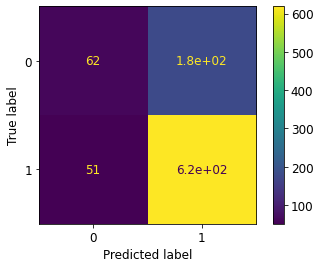

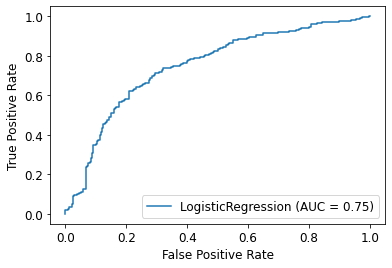

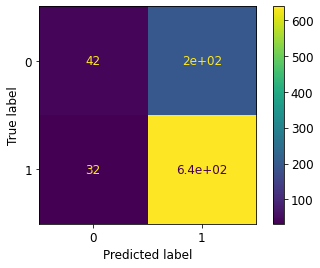

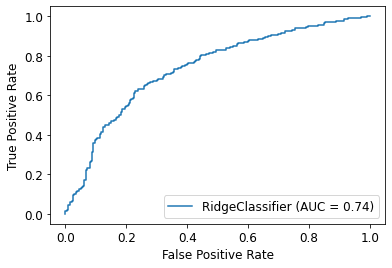

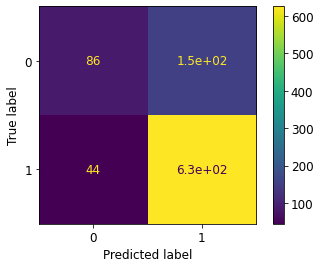

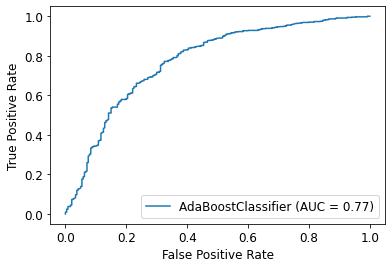

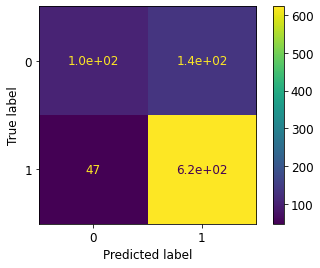

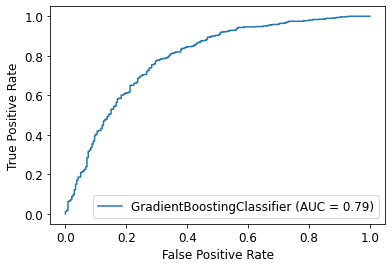

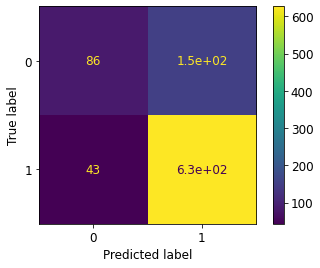

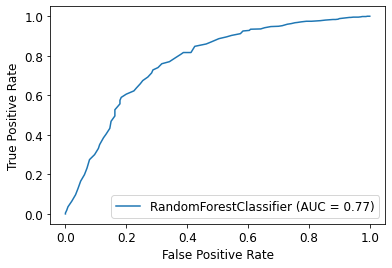

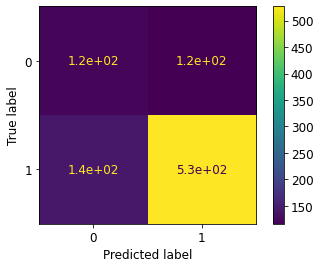

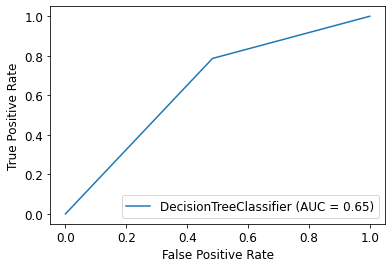

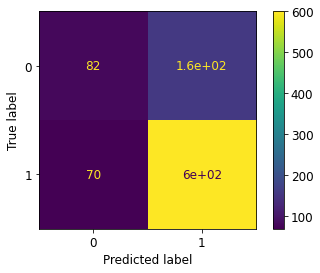

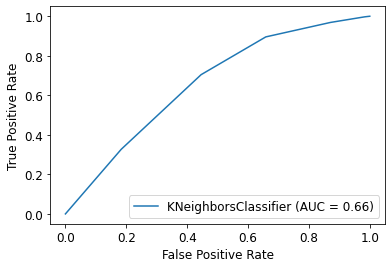

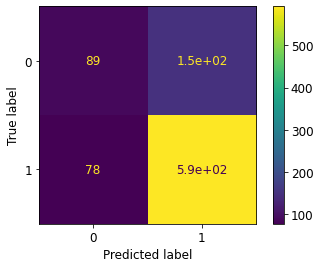

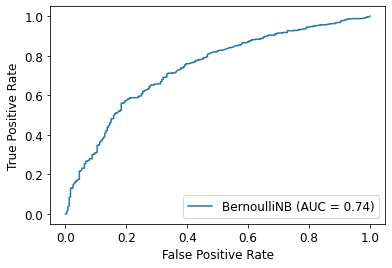

In [443]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train_smote,y_train_smote)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

contraception = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [444]:
contraception.sort_values(by='scores', ascending=False)

,names,scores,times
3,GradientBoostingClassifier,0.80,0.46
4,RandomForestClassifier,0.78,0.37
2,AdaBoostClassifier,0.78,0.22
6,KNeighborsClassifier,0.75,0.01
0,LogisticRegression,0.75,0.11
7,NaiveBayes,0.75,0.00
1,RidgeClassifier,0.75,0.01
5,DecisionTreeClassifier,0.72,0.02


**INTERPRETATION FOR SELECTION 0**

* **In this first selection amoung classifiers, we set classifers at default parameter**

* **We can see the best model is GradientBoostingClassifier with 80% accuracy**

##**SELECTION II**

LR: 0.747765 
GBC: 0.792598 
KNN: 0.737536 
DTC: 0.693366 
RFC: 0.775458 
SVM: 0.737206 


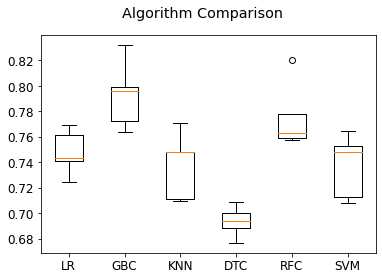

In [445]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# prepare configuration for cross validation test harness
seed = 0
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('GBC', GradientBoostingClassifier	()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**INTERPRETATION FOR SELECTION 2**

* **In this second selection amoung classifiers, we set classifers at default parameter**

* **We can see the best model is GradientBoostingClassifier with 80% accuracy**

In [446]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

In [447]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score', ascending=False):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [448]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_range = [1, 2, 3, 4, 5, 6]
from sklearn.svm import SVC
LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()
models2 = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params2 = {
    'LogisticRegression': {},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]},
}

In [449]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X, y, scoring='accuracy', n_jobs=-1)

Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    9.9s finished


In [450]:
model = helper2.score_summary(sort_by='max_score')
model[['estimator','max_score']].head()

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
DecisionTreeClassifier


,estimator,max_score
309,DecisionTreeClassifier,0.80
312,DecisionTreeClassifier,0.80
313,DecisionTreeClassifier,0.80
315,DecisionTreeClassifier,0.80
318,DecisionTreeClassifier,0.80


In [451]:
def model_analysis(true_label,predicted): 
    '''
    return all metrics results
    '''
    print(f"accuracy :", round((metrics.accuracy_score(true_label, predicted)*100)),'%')
    print("f1 score macro :", round(metrics.f1_score(true_label, predicted, average='macro')*100),'%')    
    print("f1 score micro :", round(metrics.f1_score(true_label, predicted, average='micro')*100),'%')
    print("precision score :", round(metrics.precision_score(true_label, predicted, average='macro')*100),'%') 
    print("recall score :", round(metrics.recall_score(true_label, predicted, average='macro')*100),'%')
    print("hamming_loss :", round(metrics.hamming_loss(true_label, predicted)*100),'%')
    print("classification_report :\n")
    print(metrics.classification_report(true_label, predicted))
    print("jaccard_similarity_score :", round(metrics.jaccard_similarity_score(true_label, predicted)*100),'%')
    print("log_loss :", round(metrics.log_loss(true_label, predicted)))
    print("zero_one_loss :", round(metrics.zero_one_loss(true_label, predicted)*100),'%')
    print("AUC&ROC :", round(metrics.roc_auc_score(true_label, predicted)*100),'%')
    print("matthews_corrcoef :", round(metrics.matthews_corrcoef(true_label, predicted)*100),'%')
    print("confusion matrix")
    plot_confusion_matrix(clf,X_test,y_test,cmap="YlGnBu")
    print("ROC and CURVE")
    plot_roc_curve(clf,X_test,y_test)

##**LOGISTIC REGRESSION CLASSIFIER**

In [452]:
param_grid = {'penalty':['l1','l2'],'C':[1,2,3,4,5], 'verbose':[1,2,3,4,5],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model=LogisticRegression()  
grid = GridSearchCV(model, param_grid, verbose = 2, n_jobs=-1, scoring = 'accuracy',
cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train_smote, y_train_smote) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_y_pred = grid.predict(X_test)
# model_analysis(y_test, grid_y_pred)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 724 tasks      | elapsed:   42.3s


max_iter reached after 0 seconds
{'C': 1, 'penalty': 'l1', 'solver': 'saga', 'verbose': 2}


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


#**RANDOM FOREST CLASSIFIER MODEL**

In [453]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
gdbclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
gdbclf.fit(X_train_smote,y_train_smote)

gdb_y_pred=gdbclf.predict(X_test)
# model_analysis(y_test, gdb_y_pred)

In [454]:
# Scale the data
from sklearn.preprocessing import StandardScaler
# Pipeline, Gridsearch, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import plot_confusion_matrix
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# from sklearn import svm

In [455]:
param_grid = {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}
model=DecisionTreeClassifier() 
grid = GridSearchCV(model, param_grid, verbose = 2, n_jobs=-1, scoring = 'accuracy',
cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train_smote, y_train_smote) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_dtc_y_pred = grid.predict(X_test) 

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    2.5s


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   12.6s finished


In [456]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
#pipe_svm = Pipeline([('scl', StandardScaler()),
                     #('SVM', svm.SVC(random_state=42))])
#pipe_xgb = Pipeline([('scl', StandardScaler()),
                     #('XGB', XGBClassifier(random_state=42))])

In [457]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
#svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    #'SVM__C': param_range}]
#xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    #'XGB__max_depth': param_range,
                    #'XGB__min_child_weight': param_range[:2],
                    #'XGB__subsample': param_range_fl,
                    #'XGB__n_estimators': n_estimators}]

In [458]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
#svm_grid_search = GridSearchCV(estimator=pipe_svm,
        #param_grid=svm_param_grid,
        #scoring='accuracy',
        #cv=3)
#xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        #param_grid=xgb_param_grid,
        #scoring='accuracy',
        #cv=3)

In [459]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search]
for pipe in grids:
    pipe.fit(X_train_smote,y_train_smote)

In [460]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.7483516483516484
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7824175824175824
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 5, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.7648351648351648
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5}
K-Nearest Neighbors Test Accuracy: 0.7197802197802198
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}


#**DECISION TREE CLASSIFIER MODEL**

In [461]:
# print report 
# model_analysis(y_test, gdb_y_pred)

In [462]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8087912087912088


In [463]:
# print report 
# model_analysis(y_test, grid_dtc_y_pred)

[Text(181.8310344827586, 195.696, 'X[1] <= 0.5\nentropy = 0.828\nsamples = 2123\nvalue = [554, 1569]'),
 Text(92.35862068965517, 152.208, 'X[4] <= 25.5\nentropy = 0.988\nsamples = 939\nvalue = [410, 529]'),
 Text(46.179310344827584, 108.72, 'X[0] <= 45.5\nentropy = 0.962\nsamples = 749\nvalue = [289, 460]'),
 Text(23.089655172413792, 65.232, 'X[3] <= 4.956\nentropy = 0.911\nsamples = 586\nvalue = [191, 395]'),
 Text(11.544827586206896, 21.744, '\n  (...)  \n'),
 Text(34.63448275862069, 21.744, '\n  (...)  \n'),
 Text(69.26896551724138, 65.232, 'X[2] <= 17.5\nentropy = 0.97\nsamples = 163\nvalue = [98, 65]'),
 Text(57.72413793103448, 21.744, '\n  (...)  \n'),
 Text(80.81379310344828, 21.744, '\n  (...)  \n'),
 Text(138.53793103448277, 108.72, 'X[3] <= 4.956\nentropy = 0.945\nsamples = 190\nvalue = [121, 69]'),
 Text(115.44827586206895, 65.232, 'X[0] <= 36.5\nentropy = 0.378\nsamples = 41\nvalue = [38, 3]'),
 Text(103.90344827586206, 21.744, '\n  (...)  \n'),
 Text(126.99310344827586, 21

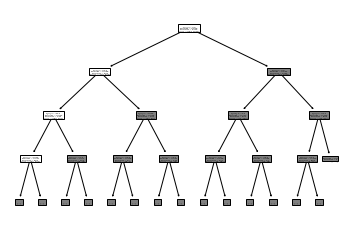

In [464]:
from sklearn import tree
tree.plot_tree(clf, max_depth=3) 

In [465]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_4 <= 25.50
|   |   |--- feature_0 <= 45.50
|   |   |   |--- feature_3 <= 4.96
|   |   |   |   |--- feature_0 <= 30.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  30.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  4.96
|   |   |   |   |--- feature_3 <= 18.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  18.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  45.50
|   |   |   |--- feature_2 <= 17.50
|   |   |   |   |--- feature_3 <= 12.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  12.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  17.50
|   |   |   |   |--- feature_0 <= 47.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  47.50
|   |   |   |   |   |--- class: 0
|   |--- feature_4 >  25.50
|   |   |--- feature_3 <= 4.96
|   |   |   |--- feature_0 <= 36.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0

##**SELECTION 0**

In [466]:
# 1. Instantiate with min_samples_split = 50
dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)

# 2. Fit
dtc.fit(X_train_smote, y_train_smote)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(X_test)

# Accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.7230769230769231

In [467]:
# Import
#from sklearn.grid_search import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [468]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.7432722118876783
{'min_samples_split': 41}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=41,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


accuracy : 81 %
f1 score macro : 70 %
f1 score micro : 81 %
precision score : 79 %
recall score : 68 %
hamming_loss : 19 %
classification_report :

              precision    recall  f1-score   support

           0       0.76      0.40      0.52       240
           1       0.82      0.96      0.88       670

    accuracy                           0.81       910
   macro avg       0.79      0.68      0.70       910
weighted avg       0.80      0.81      0.79       910

jaccard_similarity_score : 81 %
log_loss : 7
zero_one_loss : 19 %
AUC&ROC : 68 %
matthews_corrcoef : 45 %
confusion matrix
ROC and CURVE


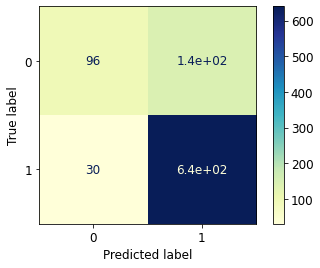

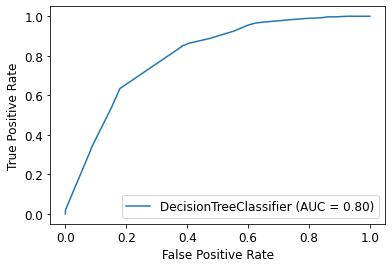

In [469]:
model_analysis(y_test, y_pred)

In [470]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
clf.predict(X_test)[0:15]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [471]:
# print the first 40 predicted probabilities for class 1
predic_40=clf.predict_proba(X_test)
predic_40=pd.DataFrame(predic_40)
predic_40[predic_40[1]>0.50]

,0,1
0,0.12,0.88
1,0.16,0.84
2,0.05,0.95
4,0.42,0.58
5,0.42,0.58
...,...,...
905,0.05,0.95
906,0.05,0.95
907,0.05,0.95
908,0.12,0.88


In [472]:
prob_40_sup_50=predic_40[predic_40[1]>0.50].shape[0]/predic_40.shape[0]
prob_40_sup_50

0.8615384615384616

In [473]:
# store the predicted probabilities for class 1
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [474]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

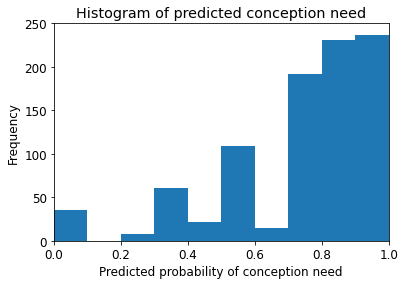

In [475]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.ylim(0,250)
plt.title('Histogram of predicted conception need')
plt.xlabel('Predicted probability of conception need')
plt.ylabel('Frequency')

##**INTERPRETATION**

* **Almost the majority of the observations have probability more than 0.8**

* **Small number of observations with probability < 0.5** : **This is below the threshold of 0.5**

* **Most of these woman would be predicted : "Yes, i need contraceptive method""**

In [476]:
# function to calculate cross-validated AUC
def precision(cv=None, scoring='scoring'):
  score = cross_val_score(clf, X_train_smote, y_train_smote, cv=cv, scoring=scoring).mean()
  return score

In [477]:
precision(cv=5, scoring='precision')

0.7975415792403292

In [478]:
precision(cv=5, scoring='accuracy')

0.7682586015538291

In [479]:
precision(cv=5, scoring='recall')

0.9138552230192101

##**ANALYSIS**
**It can be seen that the dataset is dominated by the following characteristics:** 


* **The most representative regions of the dataset are**

  * **Artibonite (11%)**
  * **Rest-West (11%)**
  * **Northwest (11%)**

* **Geographics** 
  * **2/3 are from the North West**
  * **2/3 are from urban areas** * 


* **Education**
  * **Primary school (40%)**
  * **Secondary school (30)**
  * **No education (27%)**

* **Type Of Contraceptive Method Used**
  * **About 1/3 married women used injections as modern method**

* **Wealth index**
  * **50% of the women are situated in the poor category class**

* **Religion**
  * **52% are Prostestant**
  * **42% are Catholic**
  * **6% No Religion**

* **Profession**
  * **46% have their husbands working in agriculture**

* **Let's plot histogram for numeric variable**

**Apart from the variable Total_lifetime_number_of_sex_partners**.

**The variables:**
* Respondent_s_current_age
* Number_of_household_members
* Number_of_children_5_and_under_in_household',
* Age_of_respondent_at_1st_birth
* Number_of_living_children
* Age_at_first_cohabitation
* Years_since_first_cohabitation
* Husband_partner_s_age
 
**appear to be normally distributed but a chapiro test is required to better assess this assumption**.

## **ANALYSIS**

* **The correlation matrix shows that there is :**
    * **high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)**

    * **high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)**

    * **high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)**

    * **A correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)**

* **These correlations means they could have an identical impact on target variable;**

    * **We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;**

**RECOMMANDATIONS**